# 1. Library & Data Load

In [1]:
# 분석과 시각화에 필요한 라이브러리를 임포트한다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 한글 폰트를 위한 라이브러리를 임포트하고 해당 변수를 설정한다.

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 2019년 9월 한달동안 공공자전거 이용정보 파일을 읽어들이고 데이터프레임의 첫부분을 살펴본다.

bikes = pd.read_csv('./data/서울특별시 공공자전거 이용정보_2019.6.csv', \
                    encoding = 'cp949', parse_dates=['대여일자'])

bikes.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),\N,AGE_008,3,274.9,2.48,10680,109
1,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),M,AGE_008,2,164.48,1.48,6390,60
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,6,441.55,3.78,16310,147
3,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_003,1,446.07,4.02,17330,177
4,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),F,AGE_003,2,599.23,6.1,26290,114


In [4]:
# 데이터프레임의 마지막 부분을 살표본다.

bikes.tail()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
701312,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,F,AGE_003,1,34.06,0.4,1720,10
701313,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,M,AGE_002,6,424.66,3.46,14890,71
701314,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,M,AGE_003,1,42.47,0.38,1650,9
701315,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,M,AGE_004,1,13.13,0.09,390,4
701316,2019-06-30,9997,9997.강남센터,일일(회원),M,AGE_005,1,0,0,0,6


# 2. 데이터 관찰 및 전처리

## 2-1 컬럼의 데이터타입과 누락값 조사

In [5]:
# bikes 데이터프레임의 여러가지 정보를 알아본다. 

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701317 entries, 0 to 701316
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     701317 non-null  datetime64[ns]
 1   대여소번호    701317 non-null  int64         
 2   대여소      701317 non-null  object        
 3   대여구분코드   701317 non-null  object        
 4   성별       645657 non-null  object        
 5   연령대코드    701317 non-null  object        
 6   이용건수     701317 non-null  int64         
 7   운동량      701317 non-null  object        
 8   탄소량      701317 non-null  object        
 9   이동거리(M)  701317 non-null  int64         
 10  이용시간(분)  701317 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 58.9+ MB


## 2.2 운동량, 탄소량 데이터 정리

In [21]:
#bikes.drop(['운동량', '탄소량'], axis='columns', inplace=True)

In [6]:
# 운동량 데이터에 \n값이 있어서 데이터타입이 object임 -> \n을 삭제하고 float로 변환 필요

bikes['운동량'].value_counts()

0          6120
\N         1487
37.07       355
43.24       317
30.89       310
           ... 
1588.88       1
6177.97       1
1687.54       1
1013.8        1
1582.68       1
Name: 운동량, Length: 153611, dtype: int64

In [7]:
bikes['운동량'] = bikes['운동량'].replace('\\N', np.NaN).astype(float)
bikes['탄소량'] = bikes['탄소량'].replace('\\N', np.NaN).astype(float)

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701317 entries, 0 to 701316
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     701317 non-null  datetime64[ns]
 1   대여소번호    701317 non-null  int64         
 2   대여소      701317 non-null  object        
 3   대여구분코드   701317 non-null  object        
 4   성별       645657 non-null  object        
 5   연령대코드    701317 non-null  object        
 6   이용건수     701317 non-null  int64         
 7   운동량      699830 non-null  float64       
 8   탄소량      699830 non-null  float64       
 9   이동거리(M)  701317 non-null  int64         
 10  이용시간(분)  701317 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 58.9+ MB


In [8]:
#  각 컬럼에 누락값이 있는지 확인한다.-> 성별, 운동량, 탄소량에 누락값 존재

bikes.isnull().sum()

대여일자           0
대여소번호          0
대여소            0
대여구분코드         0
성별         55660
연령대코드          0
이용건수           0
운동량         1487
탄소량         1487
이동거리(M)        0
이용시간(분)        0
dtype: int64

## 2.3 이동거리, 이동시간  평균 컬럼 추가

다음 분석 주제 >

bikes 데이터프레임의 요약 통계량을 알아본다.

이동거리와 이동시간의 max값이 생각보다 크다.

이용건수가 다수인 경우 모두 합해서 이동거리와 이용시간이 계산되었다. 

이동거리와 이용시간을 이용건수로 나눈 값을 사용한다


In [10]:
pd.options.display.float_format = '{:.2f}'.format
bikes.describe(include='number')

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,701317.00,701317.00,699830.00,699830.00,701317.00,701317.00
mean,1252.08,3.27,465.27,4.05,17405.69,88.39
std,828.67,4.36,892.73,7.72,33246.16,144.31
min,3.00,1.00,0.00,0.00,0.00,0.00
25%,537.00,1.00,72.67,0.64,2760.00,20.00
50%,1184.00,2.00,182.60,1.61,6900.00,49.00
75%,1911.00,4.00,457.20,3.97,17090.00,107.00
max,9998.00,249.00,53607.23,500.27,2156460.00,22183.00


In [11]:
# 이동거리의 max값이 너무 크다. 이동거리를 1인당으로 조정할 필요가 있다.

bikes['평균이동거리'] = bikes['이동거리(M)'].div(bikes['이용건수']).round(2)
bikes.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리
0,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),\N,AGE_008,3,274.90,2.48,10680,109,3560.00
1,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),M,AGE_008,2,164.48,1.48,6390,60,3195.00
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,6,441.55,3.78,16310,147,2718.33
3,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_003,1,446.07,4.02,17330,177,17330.00
4,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),F,AGE_003,2,599.23,6.10,26290,114,13145.00


In [12]:
# 이용시간의 max값이 너무 크다. 이용시간을 1인당으로 조정할 필요가 있다.

bikes['평균이용시간'] = bikes['이용시간(분)'].div(bikes['이용건수']).round(2)
bikes.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리,평균이용시간
0,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),\N,AGE_008,3,274.90,2.48,10680,109,3560.00,36.33
1,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),M,AGE_008,2,164.48,1.48,6390,60,3195.00,30.00
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,6,441.55,3.78,16310,147,2718.33,24.50
3,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_003,1,446.07,4.02,17330,177,17330.00,177.00
4,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),F,AGE_003,2,599.23,6.10,26290,114,13145.00,57.00


In [13]:
bikes.describe(include='number')

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리,평균이용시간
count,701317.00,701317.00,699830.00,699830.00,701317.00,701317.00,701317.00,701317.00
mean,1252.08,3.27,465.27,4.05,17405.69,88.39,5523.42,28.83
std,828.67,4.36,892.73,7.72,33246.16,144.31,9803.38,36.74
min,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,537.00,1.00,72.67,0.64,2760.00,20.00,1760.00,12.33
50%,1184.00,2.00,182.60,1.61,6900.00,49.00,3105.00,21.67
75%,1911.00,4.00,457.20,3.97,17090.00,107.00,5873.33,37.50
max,9998.00,249.00,53607.23,500.27,2156460.00,22183.00,255850.00,22183.00


## 2.4  성별 데이터 분포 검토 및 조정

In [14]:
# 수 데이터가 아닌 경우에는 표시되는 요약 통계량이 다르다.-> 성별에서 가장 빈도가 큰 값이 \N이다.

bikes.describe(include='object')

,대여소,대여구분코드,성별,연령대코드
count,701317,701317,645657,701317
unique,1543,4,5,8
top,502. 뚝섬유원지역 1번출구 앞,정기,\N,AGE_002
freq,1084,474184,298795,232196


분석 결과 >

1. 위의 요약 통계량에서 대여소는 502 뚝섬유원지역 1번출구 앞이 가장 빈도가 높고, 대여소는 1543개있다.

2. 대여구분코드는 종류가 4개이고 정기가 가장 빈도가 높다.

3. 성별은 5가지 종류의 데이터가 있고 가장 빈도가 큰 값이 \N이다.

4. 연령대코드는 8가지 종류가 있고 AGE_002가 가장 빈도가 높다.

In [15]:
# 성별 컬럼의 값을 확인한다. -> m, f를 M, F로 변환시킨다.  \n을 누락값 처리한다.

bikes['성별'].value_counts()

\N    298795
M     198721
F     146974
m        661
f        506
Name: 성별, dtype: int64

성별 컬럼에 \n값의 비율이 높아서 데이터 분석 사용시 감안하여 사용한다..
예를 들어 A 지점에서는 성별 정보가 없고 B 지점에서는 성별 정보가 있고 이러면 문제지만, 모든 지점, 모든 일시에 랜덤하게 (동일한 비율로) \n 값이 나타난다면 남녀의 분포를 확인하기위해 사용하는 것은 괜찮다. 실제 세계에서는 회원가입시 남/녀 정보를 입력하지 않음에서 오는 현상으로 이해하고 진행한다.

In [38]:
# 성별 컬럼의 값 m, f를 M, F로 변환시킨다.

bikes['성별'] = bikes['성별'].str.upper()
bikes['성별'].value_counts()

M    199382
F    147480
Name: 성별, dtype: int64

In [37]:
# '\N'값을 누락값으로 대체한다.

bikes['성별'] = bikes['성별'].replace('\\N',np.NaN)
bikes['성별'].value_counts()

M    199382
F    147480
Name: 성별, dtype: int64

In [18]:
bikes_gender = bikes.groupby('성별')['이용건수'].sum()
bikes_gender

성별
F    375773
M    594295
Name: 이용건수, dtype: int64

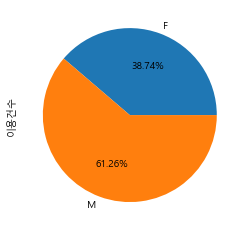

In [19]:
bikes_gender.plot(kind='pie', autopct='%1.2f%%');

분석결과 >

성별 컬럼의 데이터는 남성 사용자 비율이 61%로 더 크다.

다음 분석주제 >

대여구분코드 중에서 정기 일일(회원) 일일(비회원) 단체의 이용건수 중에서 이용건수가 가장 많은 대여코드는 ?

## 2.5 대여구분코드 분포 검토

In [20]:
#  대여구분코드의 값들을 알아본다. -> 정기 가 가장 많다.

bikes_ticket = bikes.groupby('대여구분코드')['이용건수'].sum()
bikes_ticket

대여구분코드
단체           33075
일일(비회원)      52370
일일(회원)      447336
정기         1761098
Name: 이용건수, dtype: int64

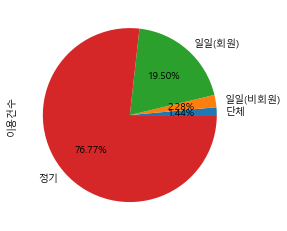

In [21]:
bikes_ticket.plot(kind='pie', autopct='%1.2f%%');

분석결과 >
대여구분코드에서 정기권과 일일(회원) 비율이 약 95프로정도 된다.

다음 분석주제 >
대여구분코드 중에서 정기 일일(회원) 일일(비회원) 단체의 이용건수 중에서  남녀 성별의 차이가 있는지 ?

## 2.6 대여구분코드별 성별 조사 및 검토

In [22]:
# 대여구분코드와 성별로 그룹화해서 이용건수를 조사한다.

ticket_gender = bikes.pivot_table(
        index = '성별', columns = '대여구분코드', values = '이용건수', aggfunc = 'sum'
)
ticket_gender

대여구분코드,단체,일일(비회원),일일(회원),정기
성별,,,,
F,4781,748,66903,303341
M,4730,641,75327,513597


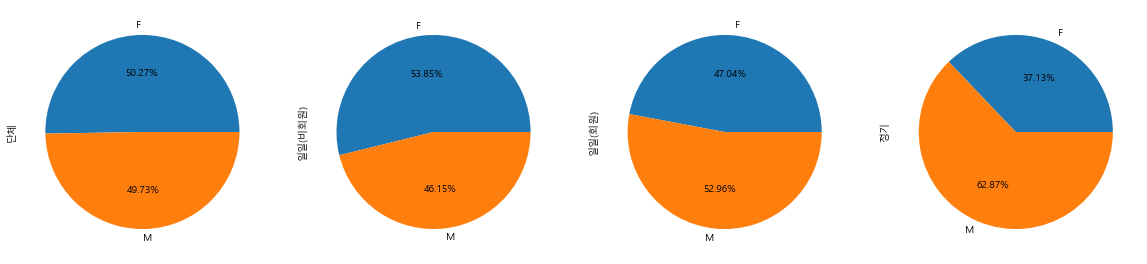

In [40]:
ticket_gender.plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', figsize=(20, 6));

분석결과 >

대여구분코드와 성별의 이용건수의 합을 보면, 정기권에서는 남자의 비율이 여자보다 많으나, 일일(회원), 일일(비회원), 단체에서는 남녀 비율이 비슷하다. 정기권에서 남자의 비율이 높은 이유는 출퇴근 인구 차이가 아닐까 생각한다.

다음 분석주제 >

정기권 일일(회원) 일일(비회원) 단체 중에서 이용객수를 늘릴 수 있는 연령대는 ?

대여구분코드와 연령대코드별로 이용건수를 조사한다.

## 2.7 대여구분코드별 연령분포를 조사

In [29]:
age_ticket = bikes.pivot_table(
        index = '연령대코드', 
        columns = '대여구분코드', 
        values = '이용건수', 
        aggfunc = 'sum'
)
age_ticket

대여구분코드,단체,일일(비회원),일일(회원),정기
연령대코드,,,,
AGE_001,5375.00,nan,32733.00,59434.00
AGE_002,16492.00,30.00,297481.00,835245.00
AGE_003,4802.00,2.00,80748.00,428761.00
AGE_004,5459.00,nan,25735.00,259571.00
AGE_005,859.00,nan,8593.00,137970.00
AGE_006,54.00,nan,1578.00,32865.00
AGE_007,30.00,nan,389.00,6760.00
AGE_008,4.00,52338.00,79.00,492.00


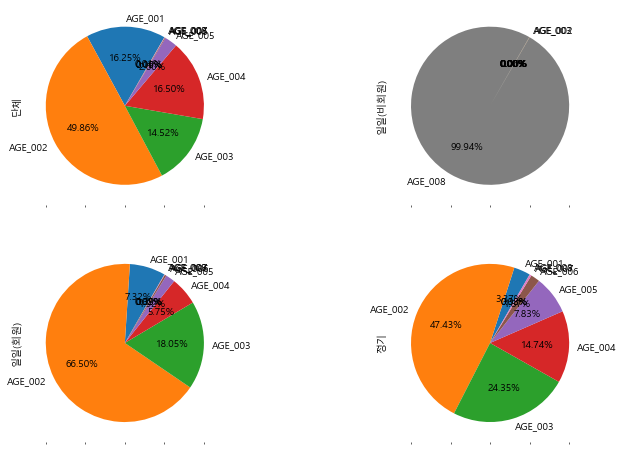

In [30]:
age_ticket.plot(kind='pie', subplots=True, layout=(2, 2), legend=False, \
                autopct='%1.2f%%', figsize=(12, 8), startangle=60);

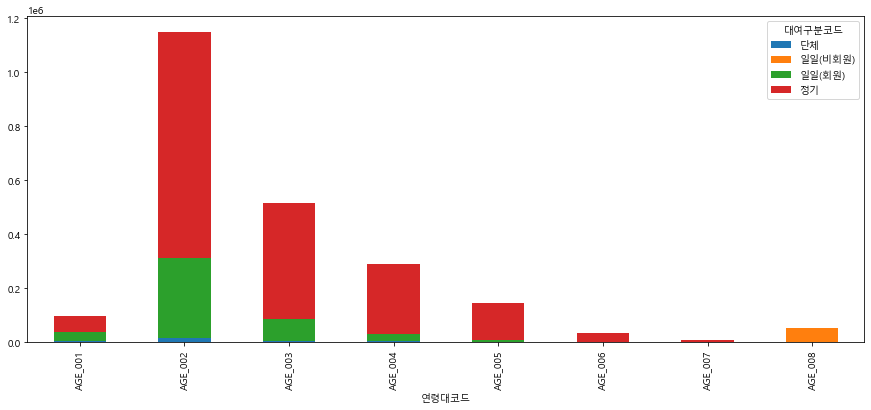

In [31]:
# 일일 비회원은 20-30대만 있다.

age_ticket.plot(kind='bar', figsize=(15,6), stacked=True);

분석결과 >

1. 일일 비회원에는 연령대가 대부분 AGE_008이다. AGE_008이 80대 연령을 의미하는 것이 아니라 입력하지 않은 경우에 AGE_008로 표시되는 것으로 보인다. 따라서 일일 비회원 데이터는 분석에 사용하기가 곤란하다.

2. 연령대가 올라갈수록 정기권 비율이 높아진다.

3. 20대는 정기권도 많지만 일일 회원도 많다.


##  2.7 대여구분코드별로 연령대 비율 조사 -> 실습안함

In [32]:
ratio_age_byticket = age_ticket.div(bikes.groupby('대여구분코드')['이용건수'].sum())
ratio_age_byticket

대여구분코드,단체,일일(비회원),일일(회원),정기
연령대코드,,,,
AGE_001,0.16,nan,0.07,0.03
AGE_002,0.50,0.00,0.67,0.47
AGE_003,0.15,0.00,0.18,0.24
AGE_004,0.17,nan,0.06,0.15
AGE_005,0.03,nan,0.02,0.08
AGE_006,0.00,nan,0.00,0.02
AGE_007,0.00,nan,0.00,0.00
AGE_008,0.00,1.00,0.00,0.00


In [33]:
ratio_age_byticket.T

연령대코드,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008
대여구분코드,,,,,,,,
단체,0.16,0.50,0.15,0.17,0.03,0.00,0.00,0.00
일일(비회원),nan,0.00,0.00,nan,nan,nan,nan,1.00
일일(회원),0.07,0.67,0.18,0.06,0.02,0.00,0.00,0.00
정기,0.03,0.47,0.24,0.15,0.08,0.02,0.00,0.00


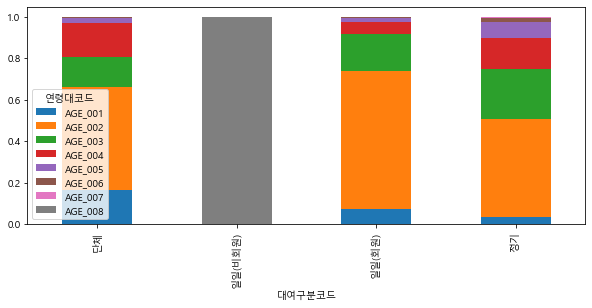

In [34]:
ratio_age_byticket.T.plot(kind = 'bar', stacked = True, figsize=(10, 4));

## 2.8 연령별로 대여구분코드의 비율 조사

In [80]:
ticket_age = bikes.pivot_table( \
                              index = '대여구분코드', \
                              columns = '연령대코드', \
                              values = '이용건수', \
                              aggfunc = 'sum')
ticket_age

연령대코드,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008
대여구분코드,,,,,,,,
단체,5375.0,16492.0,4802.0,5459.0,859.0,54.0,30.0,4.0
일일(비회원),NaN,30.0,2.0,NaN,NaN,NaN,NaN,52338.0
일일(회원),32733.0,297481.0,80748.0,25735.0,8593.0,1578.0,389.0,79.0
정기,59434.0,835245.0,428761.0,259571.0,137970.0,32865.0,6760.0,492.0


In [81]:
ratio_ticket_byage = ticket_age.div(bikes.groupby(['연령대코드'])['이용건수'].sum())
ratio_ticket_byage

연령대코드,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008
대여구분코드,,,,,,,,
단체,0.055104,0.014350,0.009337,0.018775,0.005827,0.001565,0.004179,0.000076
일일(비회원),NaN,0.000026,0.000004,NaN,NaN,NaN,NaN,0.989133
일일(회원),0.335579,0.258848,0.157002,0.088508,0.058288,0.045743,0.054186,0.001493
정기,0.609317,0.726775,0.833658,0.892717,0.935885,0.952692,0.941635,0.009298


In [89]:
ratio_ticket_byage.T

대여구분코드,단체,일일(비회원),일일(회원),정기
연령대코드,,,,
AGE_001,0.055104,NaN,0.335579,0.609317
AGE_002,0.014350,0.000026,0.258848,0.726775
AGE_003,0.009337,0.000004,0.157002,0.833658
AGE_004,0.018775,NaN,0.088508,0.892717
AGE_005,0.005827,NaN,0.058288,0.935885
AGE_006,0.001565,NaN,0.045743,0.952692
AGE_007,0.004179,NaN,0.054186,0.941635
AGE_008,0.000076,0.989133,0.001493,0.009298


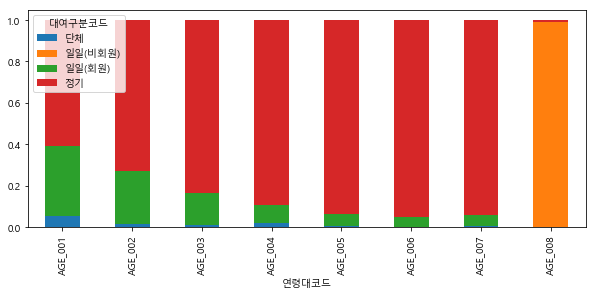

In [85]:
"""***   연령대 별로 정기, 일일(회원) 비율이 다르다.  연령대가 높아질 수록 정기권 사용 비율이 높다"""

ratio_ticket_byage.T.plot(kind = 'bar', stacked = True, figsize=(10, 4));

분석결과 >
1. 일일 비회원은 연령별코드에는 AGE_008이 많아서 데이터분석에 쓰기 어렵다.
2. 나머지 정기, 일일회원, 단체에서 20대가 가장 많은 비중을 차지한다.
3. 연령대 별로 정기, 일일(회원) 비율이 다르다.  연령대가 높아질 수록 정기권 사용 비율이 높다
4. 따릉이 이용건수를 높이려면 20대의 정기권 이용건수를 높이는 방향으로 한다.
5. 20대는 따릉이를 주말과 평일 중 어느 쪽에 더 많이 사용하는지 알아본다.

다음 분석주제 >
1. 주말과 평일 중에서 20대가 많이 사용하는 시기는 ?
2. 20대가 가장 많이 이용하는 대여점은 ?

# 3. 데이터 분석

## 3.1 주말과 평일 따릉이 이용 패턴

In [39]:
# 대여일자에서 요일과 주말 데이터를 추출한다.

day_of_week = ['월', '화', '수', '목', '금', '토', '일']
bikes['요일'] = bikes['대여일자'].dt.dayofweek
bikes['요일'] = bikes['요일'].apply(lambda x: day_of_week[x])
bikes['주말'] = bikes['요일'].apply(lambda x : '주말' if x in ['토', '일'] else '평일')

In [40]:
bikes.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리,평균이용시간,요일,주말
0,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),NaN,AGE_008,3,274.90,2.48,10680,109,3560.00,36.33,토,주말
1,2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),M,AGE_008,2,164.48,1.48,6390,60,3195.00,30.00,토,주말
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_002,6,441.55,3.78,16310,147,2718.33,24.50,토,주말
3,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_003,1,446.07,4.02,17330,177,17330.00,177.00,토,주말
4,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),F,AGE_003,2,599.23,6.10,26290,114,13145.00,57.00,토,주말


In [181]:
age20 = bikes[bikes['연령대코드'] == 'AGE_002']
age20.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일,주말
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,6,441.55,3.78,16310,147,토,주말
5,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,148.78,1.34,5780,27,토,주말
6,2019-06-01,101,101. (구)합정동 주민센터,정기,\N,AGE_002,4,282.36,2.24,9670,66,토,주말
9,2019-06-01,101,101. (구)합정동 주민센터,정기,F,AGE_002,4,212.99,2.16,9290,75,토,주말
11,2019-06-01,101,101. (구)합정동 주민센터,정기,M,AGE_002,4,134.66,1.08,4680,26,토,주말


In [184]:
# 요일별 따릉이 이용건수를 합한다.
age20_dayofweek = age20.groupby('요일')['이용건수'].sum().sort_values(ascending=False)
age20_dayofweek

요일
토    201021
일    198616
월    161330
수    157944
화    146373
금    144538
목    139426
Name: 이용건수, dtype: int64

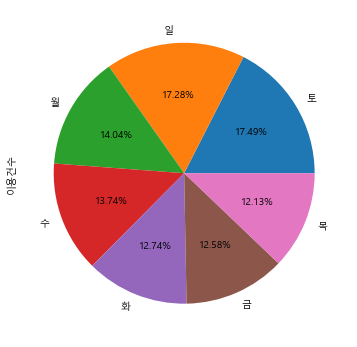

In [185]:
age20_dayofweek.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 6));

In [186]:
age20_weekend = age20.groupby('주말')['이용건수'].sum()
age20_weekend

주말
주말    399637
평일    749611
Name: 이용건수, dtype: int64

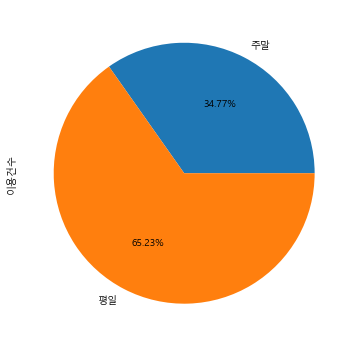

In [187]:
age20_weekend.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 6));

## 3.2  주말과 평일의 시간대별 따릉이 이용

In [188]:
#  2019년 6월 3개로 나누어진 raw data로 읽어 들이고 연결한다. 

bikes_1 = pd.read_csv('서울특별시 공공자전거 대여정보_201906_1.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bikes_2 = pd.read_csv('서울특별시 공공자전거 대여정보_201906_2.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bikes_3 = pd.read_csv('서울특별시 공공자전거 대여정보_201906_3.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bike_ride = pd.concat([bikes_1, bikes_2, bikes_3], axis = 'index', ignore_index = True)

bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0


In [203]:
bike_ride.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말,시간대
2215627,SPB-22438,2019-06-24 07:40:39,240,문래역 4번출구 앞,8,2019-06-24 07:54:16,9998,영남주차장 정비센터,10,13,900.0,월,평일,7
2215628,SPB-24455,2019-06-25 07:34:58,240,문래역 4번출구 앞,7,2019-06-25 07:42:14,9998,영남주차장 정비센터,4,6,880.0,화,평일,7
2215629,SPB-24557,2019-06-26 08:19:57,240,문래역 4번출구 앞,4,2019-06-26 08:27:49,9998,영남주차장 정비센터,10,7,930.0,수,평일,8
2215630,SPB-00649,2019-06-27 07:38:12,240,문래역 4번출구 앞,9,2019-06-27 07:49:52,9998,영남주차장 정비센터,10,11,1030.0,목,평일,7
2215631,SPB-14209,2019-06-28 07:37:07,240,문래역 4번출구 앞,10,2019-06-28 07:43:54,9998,영남주차장 정비센터,10,6,1010.0,금,평일,7


In [204]:
bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 14 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
요일          object
주말          object
시간대         int64
dtypes: datetime64[ns](2), float64(1), int64(6), object(5)
memory usage: 236.7+ MB


In [201]:
# 누락값 없음
bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
주말          0
시간대         0
dtype: int64

In [209]:
pd.options.display.float_format = '{:.2f}'.format

bike_ride.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,시간대
count,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00
mean,1226.15,7.01,1228.35,6.97,27.17,3912.92,14.49
std,849.92,5.24,846.23,5.24,29.08,5145.47,6.33
min,3.00,1.00,3.00,1.00,1.00,0.00,0.00
25%,505.00,3.00,512.00,3.00,8.00,1220.00,10.00
50%,1159.00,6.00,1159.00,6.00,17.00,2270.00,16.00
75%,1846.00,10.00,1839.00,10.00,37.00,4670.00,19.00
max,9998.00,40.00,9998.00,40.00,3133.00,232310.00,23.00


In [207]:
bike_ride.describe(include='object')

,자전거번호,대여 대여소명,반납대여소명,요일,주말
count,2215632,2215632,2215632,2215632,2215632
unique,19029,1543,1543,7,2
top,SPB-17237,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,토,평일
freq,292,12617,14019,375943,1478599


In [214]:
# 대여일시에서 요일, 주말, 시간대 데이터를 추출한다.

day_of_week = ['월', '화', '수', '목', '금', '토', '일']
bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek
bike_ride['요일'] = bike_ride['요일'].apply(lambda x: day_of_week[x])
bike_ride['주말구분'] = bike_ride['요일'].\
                    apply(lambda x : '주말' if x in ['토', '일'] else '평일')
bike_ride['시간대'] = bike_ride['대여일시'].dt.hour
bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말,시간대,주말구분
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,8,평일
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00,월,평일,8,평일
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00,수,평일,8,평일
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00,수,평일,8,평일
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00,월,평일,8,평일


In [192]:
bike_ride['시간대'].value_counts()

18    223048
19    173363
17    159654
20    157771
21    150714
22    133547
16    119201
8     115034
15     98204
23     93681
14     90316
13     85899
12     79602
0      74628
9      71690
7      68443
11     68336
10     59457
1      56956
2      40981
3      30747
6      29987
4      17751
5      16622
Name: 시간대, dtype: int64

### 주말과 평일의 시간대별 따릉이 이용건수

In [198]:
weekdays_byhour = bike_ride.pivot_table(\
                     index = '시간대', \
                     columns = '주말', \
                     values = '자전거번호', \
                     aggfunc = 'count')
weekdays_byhour

주말,주말,평일
시간대,,
0,30564,44064
1,23030,33926
2,17189,23792
3,14998,15749
4,7678,10073
5,5198,11424
6,6675,23312
7,9307,59136
8,15370,99664


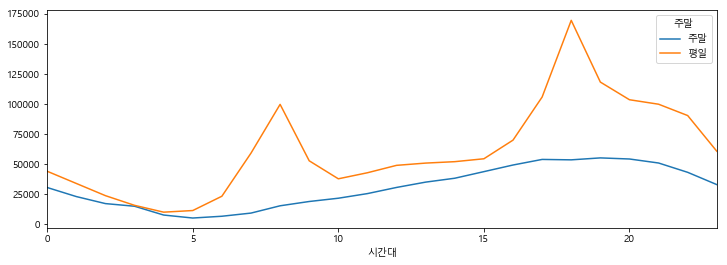

In [228]:
# 평일은 출퇴근 시간에 따릉이 이용이 많고 주말에는 오전 7시부터 19시까지 증가세가 있다.

weekdays_byhour.plot(figsize=(12, 4));

### 주말과 평일의 시간대별 이용거리의 평균

In [229]:
weekdays_distance_byhour = bike_ride.pivot_table(\
                     index = '시간대', \
                     columns = '주말', \
                     values = '이용거리', \
                     aggfunc = 'mean')
weekdays_distance_byhour

주말,주말,평일
시간대,,
0,3704.34,3324.51
1,3626.33,3406.94
2,3493.73,3355.57
3,3417.70,3431.31
4,3384.45,3369.53
5,3571.12,3363.60
6,4208.65,3270.58
7,4426.38,3087.02
8,3744.83,2532.87


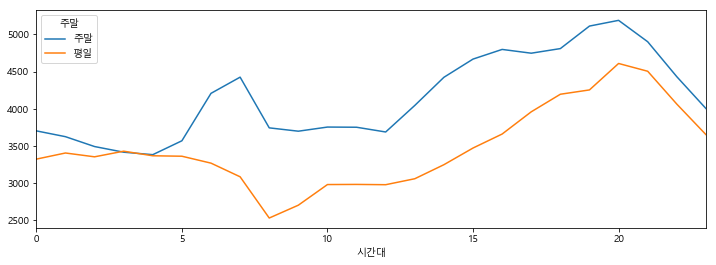

In [231]:
weekdays_distance_byhour.plot(figsize=(12,4));

In [232]:
weekdays_time_byhour = bike_ride.pivot_table(\
                     index = '시간대', \
                     columns = '주말', \
                     values = '이용시간', \
                     aggfunc = 'mean')
weekdays_time_byhour

주말,주말,평일
시간대,,
0,25.15,22.31
1,24.32,22.27
2,23.34,22.22
3,22.33,21.87
4,21.32,20.94
5,22.08,21.02
6,24.90,18.82
7,26.25,16.60
8,23.13,14.63


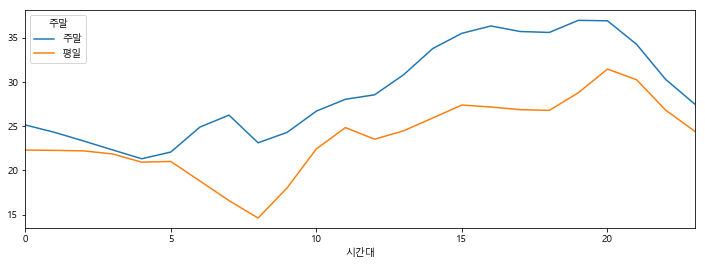

In [233]:
weekdays_time_byhour.plot(figsize=(12,4));

## 3.3 주말과 평일에 인기있는 대여 대여소명과 반납 대여소명

In [218]:
rent_bike = bike_ride.pivot_table( \
                     index = ['대여 대여소번호','대여 대여소명'], \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count').fillna(0).astype(int)

In [222]:
rent_bike['주말'].nlargest(10)

대여 대여소번호  대여 대여소명                
502       뚝섬유원지역 1번출구 앞              5777
207       여의나루역 1번출구 앞               5286
2219      고속터미널역 8-1번, 8-2번 출구 사이    3932
2102      봉림교 교통섬                    3699
1210      롯데월드타워(잠실역2번출구 쪽)          3231
152       마포구민체육센터 앞                 3229
3533      건대입구역 사거리(롯데백화점)           3169
113       홍대입구역 2번출구 앞               2922
1222      잠실새내역 5번 출구 뒤              2632
272       당산육갑문                      2327
Name: 주말, dtype: int32

In [223]:
rent_bike['평일'].nlargest(10)

대여 대여소번호  대여 대여소명                
502       뚝섬유원지역 1번출구 앞              6840
207       여의나루역 1번출구 앞               6241
2102      봉림교 교통섬                    5986
113       홍대입구역 2번출구 앞               5617
1210      롯데월드타워(잠실역2번출구 쪽)          5383
2701      마곡나루역 5번출구 뒤편              4648
3533      건대입구역 사거리(롯데백화점)           4573
2219      고속터미널역 8-1번, 8-2번 출구 사이    4556
1160      양천향교역 7번출구앞                4342
1308      안암로터리 버스정류장 앞              4127
Name: 평일, dtype: int32

In [225]:
return_bike = bike_ride.pivot_table( \
                     index = ['반납대여소번호','반납대여소명'], \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count').fillna(0).astype(int)
return_bike

,주말구분,주말,평일
반납대여소번호,반납대여소명,,
3,중랑센터,0,21
5,상암센터 정비실,1,7
7,이동정비,3,3
101,(구)합정동 주민센터,348,722
102,망원역 1번출구 앞,1260,2609
103,망원역 2번출구 앞,980,1717
104,합정역 1번출구 앞,857,1411
105,합정역 5번출구 앞,432,853
106,합정역 7번출구 앞,2214,2862


In [226]:
return_bike['주말'].nlargest(10)

반납대여소번호  반납대여소명                 
502      뚝섬유원지역 1번출구 앞              6585
207      여의나루역 1번출구 앞               5634
2219     고속터미널역 8-1번, 8-2번 출구 사이    4185
2102     봉림교 교통섬                    3733
152      마포구민체육센터 앞                 3640
3533     건대입구역 사거리(롯데백화점)           3317
113      홍대입구역 2번출구 앞               3266
1210     롯데월드타워(잠실역2번출구 쪽)          3231
1222     잠실새내역 5번 출구 뒤              2740
272      당산육갑문                      2422
Name: 주말, dtype: int32

In [227]:
return_bike['평일'].nlargest(10)

반납대여소번호  반납대여소명                 
502      뚝섬유원지역 1번출구 앞              7434
113      홍대입구역 2번출구 앞               6817
2102     봉림교 교통섬                    6080
207      여의나루역 1번출구 앞               5812
1210     롯데월드타워(잠실역2번출구 쪽)          5405
1308     안암로터리 버스정류장 앞              4749
2701     마곡나루역 5번출구 뒤편              4699
3533     건대입구역 사거리(롯데백화점)           4679
2219     고속터미널역 8-1번, 8-2번 출구 사이    4624
152      마포구민체육센터 앞                 4549
Name: 평일, dtype: int32

## 3.1  20대 사용 패턴 (top 10, buttom 10)

In [42]:
# 20대가 많이 사용하는 대여점은 ?

age20 = bikes[bikes['연령대코드'] == 'AGE_002']
age20.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),평균이동거리,평균이용시간
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_002,6,16310,147,2718.33,24.50
5,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,5780,27,5780.00,27.00
6,2019-06-01,101,101. (구)합정동 주민센터,정기,NaN,AGE_002,4,9670,66,2417.50,16.50
9,2019-06-01,101,101. (구)합정동 주민센터,정기,F,AGE_002,4,9290,75,2322.50,18.75
11,2019-06-01,101,101. (구)합정동 주민센터,정기,M,AGE_002,4,4680,26,1170.00,6.50


In [43]:
# 20대에서 이용건수의 합이 가장 많은 대여점 10개를 뽑는다.

age20_top10 = age20.groupby(['대여소번호','대여소'])['이용건수'].sum().sort_values(ascending=False).head(10)
age20_top10

대여소번호  대여소                          
502    502. 뚝섬유원지역 1번출구 앞               7649
207    207. 여의나루역 1번출구 앞                6089
2102   2102. 봉림교 교통섬                    5690
1210   1210. 롯데월드타워(잠실역2번출구 쪽)          5193
113    113. 홍대입구역 2번출구 앞                5130
3533   3533. 건대입구역 사거리(롯데백화점)           5127
2219   2219. 고속터미널역 8-1번, 8-2번 출구 사이    4949
1308   1308. 안암로터리 버스정류장 앞              4863
590    590. 건국대학교 (입학정보관)               4087
152    152. 마포구민체육센터 앞                  3706
Name: 이용건수, dtype: int64

In [44]:
# 동일한 방법으로 20대가 가장 이용하지 않는 대여소를 구한다.

age20_bottom10 = age20.groupby(['대여소번호','대여소'])['이용건수'].sum().sort_values().head(13)
age20_bottom10

대여소번호  대여소                    
9993   9993. 개화정비                  4
2391   2391. 구룡마을 입구(개포1단지아파트)     5
9997   9997.강남센터                   5
2288   2288. 안골마을입구                8
2286   2286. 탑성마을입구               13
449    449. 일성아파트                 13
937    937. 상림마을 롯데캐슬2단지 옆        15
1739   1739. 창동한신                 23
2287   2287. 능안마을입구               27
2275   2275. 염곡치안센터 건너편           31
1039   1039. 고덕초등학교               34
3539   3539. 서원마을                 36
1007   1007.암사동 선사유적지             36
Name: 이용건수, dtype: int64

분석결과 >

20대가 많이 사용하는 top10은 주로 대학교, 번화가이고 가장 인기 없는 지역은 서울 변두리 지역으로 보이나 정확히 위치를 알 수는 없다.

다음 분석주제 > 

20대가 가장 많이 이용하는 대여점과 가장 인기 없는 대여점을 지도에 표시해본다.
대여소의 주소와 위도, 경도가 있는 파일을 다운받고 전처리한다.

## 3.2 지도정보
- 위치정보를 별도 대여소정보 테이블에서 가지고 옴

In [45]:
# 서울시 열린데이터 사이트에서 '대여소번호'에 떄른 위도와 경도가 표시된 파일을 다운받아 읽어들인다.

rental_spots = pd.read_excel('./data/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx', encoding='cp949')
rental_spots.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [46]:
rental_spots.tail()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
1536,관악구,2185.0,대학동 고시촌,서울특별시 관악구 신림로 97 밀라트,37.470467,126.938652,2019.09.26,10
1537,서초구,2265.0,2265. 이수고가차도 남단,서울특별시 서초구 동작대로 204 청남빌딩,37.494743,126.983063,2017-08-09 11:16:28,10
1538,종로구,465.0,465. 삼청공원 앞,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019.11.20,5
1539,종로구,664.0,서울시립대 대학본부,동대문구 서울시립대로 163 서울시립대학교,37.584129,127.057938,2019.11.20,10
1540,합계,NaN,1540,NaN,NaN,NaN,NaN,19545


In [47]:
rental_spots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소_구   1541 non-null   object 
 1   대여소ID   1540 non-null   float64
 2   대여소명    1541 non-null   object 
 3   대여소주소   1540 non-null   object 
 4   위도      1540 non-null   float64
 5   경도      1540 non-null   float64
 6   기준시작일자  1540 non-null   object 
 7   거치대수    1541 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 96.4+ KB


In [48]:
# rental_spots 데이터프레임에 누락값이 있는지 조사한다.

rental_spots.isnull().sum()

대여소_구     0
대여소ID     1
대여소명      0
대여소주소     1
위도        1
경도        1
기준시작일자    1
거치대수      0
dtype: int64

In [49]:
rental_spots[rental_spots['대여소ID'].isnull()]

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
1540,합계,NaN,1540,NaN,NaN,NaN,NaN,19545


In [50]:
# 누락값이 있는 행을 제거하고, 누락겂이 없는지 다시 조사한다.

rental_spots = rental_spots.dropna()
rental_spots.isnull().sum()

대여소_구     0
대여소ID     0
대여소명      0
대여소주소     0
위도        0
경도        0
기준시작일자    0
거치대수      0
dtype: int64

In [51]:
# 누락값이 없는 데이터프레임에서 필요한 컬럼을 선택하고 컬럼명과 데이터타입을 통일시킨다. 대여소번호를 인덱스로 설정한다.

rental_spots = rental_spots[['대여소ID', '대여소명', '대여소주소', '위도', '경도']]
rental_spots.columns = ['대여소번호', '대여소명', '대여소주소', '위도', '경도']
rental_spots['대여소번호'] = rental_spots['대여소번호'].astype(int)
rental_spots.set_index('대여소번호', inplace=True)

rental_spots.head()

,대여소명,대여소주소,위도,경도
대여소번호,,,,
101,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
102,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
103,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
104,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
105,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825


In [52]:
age20_top10 = age20_top10.reset_index().set_index('대여소번호')
age20_top10

,대여소,이용건수
대여소번호,,
502,502. 뚝섬유원지역 1번출구 앞,7649
207,207. 여의나루역 1번출구 앞,6089
2102,2102. 봉림교 교통섬,5690
1210,1210. 롯데월드타워(잠실역2번출구 쪽),5193
113,113. 홍대입구역 2번출구 앞,5130
3533,3533. 건대입구역 사거리(롯데백화점),5127
2219,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",4949
1308,1308. 안암로터리 버스정류장 앞,4863
590,590. 건국대학교 (입학정보관),4087


In [53]:
# top10.index.values를 사용하여 rental_sppots에서 해당 대여소의 대여소명, 위도, 경도 데이터를 가져온다.

top10_rental = rental_spots.loc[age20_top10.index]
top10_rental

,대여소명,대여소주소,위도,경도
대여소번호,,,,
502,502. 뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10,37.531860,127.067192
207,207. 여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098
2102,2102. 봉림교 교통섬,서울특별시 관악구 관천로 52,37.484230,126.926392
1210,1210. 롯데월드타워(잠실역2번출구 쪽),서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
113,113. 홍대입구역 2번출구 앞,서울특별시 마포구 양화로 165,37.557499,126.923805
3533,건대입구역 사거리(롯데백화점),광진구 자양동 227-337,37.539139,127.070618
2219,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",서울특별시 서초구 신반포로 지하 188,37.506199,127.003944
1308,1308. 안암로터리 버스정류장 앞,서울특별시 성북구 안암로 69,37.582592,127.028976
590,590. 건국대학교 (입학정보관),서울특별시 광진구 능동로 120,37.539890,127.073364


In [54]:
# 위에서 구한 top10과 top10_loc를 컬럼방향으로 합하여 최종 데이터프레임을 구한다.대여소번호

top10_rental = pd.concat([age20_top10, top10_rental], axis='columns')
top10_rental

,대여소,이용건수,대여소명,대여소주소,위도,경도
대여소번호,,,,,,
502,502. 뚝섬유원지역 1번출구 앞,7649,502. 뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10,37.531860,127.067192
207,207. 여의나루역 1번출구 앞,6089,207. 여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098
2102,2102. 봉림교 교통섬,5690,2102. 봉림교 교통섬,서울특별시 관악구 관천로 52,37.484230,126.926392
1210,1210. 롯데월드타워(잠실역2번출구 쪽),5193,1210. 롯데월드타워(잠실역2번출구 쪽),서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
113,113. 홍대입구역 2번출구 앞,5130,113. 홍대입구역 2번출구 앞,서울특별시 마포구 양화로 165,37.557499,126.923805
3533,3533. 건대입구역 사거리(롯데백화점),5127,건대입구역 사거리(롯데백화점),광진구 자양동 227-337,37.539139,127.070618
2219,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",4949,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",서울특별시 서초구 신반포로 지하 188,37.506199,127.003944
1308,1308. 안암로터리 버스정류장 앞,4863,1308. 안암로터리 버스정류장 앞,서울특별시 성북구 안암로 69,37.582592,127.028976
590,590. 건국대학교 (입학정보관),4087,590. 건국대학교 (입학정보관),서울특별시 광진구 능동로 120,37.539890,127.073364


In [55]:
9993   9993. 개화정비                  4
2391   2391. 구룡마을 입구(개포1단지아파트)     5
9997   9997.강남센터                   5
2288   2288. 안골마을입구                8
2286   2286. 탑성마을입구               13
449    449. 일성아파트                 13
937    937. 상림마을 롯데캐슬2단지 옆        15
1739   1739. 창동한신                 23
2287   2287. 능안마을입구               27
2275   2275. 염곡치안센터 건너편           31
1039   1039. 고덕초등학교               34
3539   3539. 서원마을                 36
1007   1007.암사동 선사유적지             36

SyntaxError: invalid syntax (<ipython-input-55-6df8f1a9dd63>, line 1)

In [56]:
age20_bottom10 = age20_bottom10.reset_index().set_index('대여소번호')
age20_bottom10

,대여소,이용건수
대여소번호,,
9993,9993. 개화정비,4
2391,2391. 구룡마을 입구(개포1단지아파트),5
9997,9997.강남센터,5
2288,2288. 안골마을입구,8
2286,2286. 탑성마을입구,13
449,449. 일성아파트,13
937,937. 상림마을 롯데캐슬2단지 옆,15
1739,1739. 창동한신,23
2287,2287. 능안마을입구,27


In [57]:
# bottom10.index.values에는 사용이 적은 대여소여서 rental_spots에 해당 대여서정보가 없는 경우가 있으므로, rental_spots의 대여소번호
# 인덱스와 bottom10의 인덱스의 교집합의 값을 구한다.

bottom10_idx_val = rental_spots.index.intersection(age20_bottom10.index).values
bottom10_idx_val

array([ 449,  937, 1007, 1039, 2275, 2286, 2287, 2288, 2391, 3539],
      dtype=int64)

In [59]:
# 위에서 구한 bottom10_idx_val를 사용하여 rental_sppots에서 해당 대여소의 대여소명, 위도, 경도 데이터를 가져온다.

bottom10_rental = rental_spots.loc[bottom10_idx_val]
#bottom10_rental = rental_spots.loc[age20_bottom10.index]
bottom10_rental

,대여소명,대여소주소,위도,경도
대여소번호,,,,
449,449. 일성아파트,서울특별시 종로구 평창문화로 119,37.608719,126.972862
937,937. 상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23,37.645851,126.923798
1007,1007.암사동 선사유적지,서울특별시 강동구 올림픽로 875,37.559517,127.130844
1039,1039. 고덕초등학교,서울특별시 고덕동 215,37.561279,127.167801
2275,2275. 염곡치안센터 건너편,서울특별시 염곡동 260-1,37.461578,127.048798
2286,2286. 탑성마을입구,서울특별시 서초구 탑성말길 2,37.458549,127.055885
2287,2287. 능안마을입구,서울특별시 서초구 능안말길 1-2,37.455620,127.067101
2288,2288. 안골마을입구,서울특별시 서초구 안골2길 3,37.455608,127.064453
2391,구룡터널 입구,강남구 개포동 146-1,37.475986,127.059624


In [60]:
# 위에서 구한 bottom10과 bpttp,10_loc를 컬럼방향으로 합하여 최종 데이터프레임을 구한다.

bottom10_rental = pd.concat([age20_bottom10, bottom10_rental], axis='columns')
bottom10_rental

,대여소,이용건수,대여소명,대여소주소,위도,경도
대여소번호,,,,,,
449,449. 일성아파트,13,449. 일성아파트,서울특별시 종로구 평창문화로 119,37.608719,126.972862
937,937. 상림마을 롯데캐슬2단지 옆,15,937. 상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23,37.645851,126.923798
1007,1007.암사동 선사유적지,36,1007.암사동 선사유적지,서울특별시 강동구 올림픽로 875,37.559517,127.130844
1039,1039. 고덕초등학교,34,1039. 고덕초등학교,서울특별시 고덕동 215,37.561279,127.167801
1739,1739. 창동한신,23,NaN,NaN,NaN,NaN
2275,2275. 염곡치안센터 건너편,31,2275. 염곡치안센터 건너편,서울특별시 염곡동 260-1,37.461578,127.048798
2286,2286. 탑성마을입구,13,2286. 탑성마을입구,서울특별시 서초구 탑성말길 2,37.458549,127.055885
2287,2287. 능안마을입구,27,2287. 능안마을입구,서울특별시 서초구 능안말길 1-2,37.455620,127.067101
2288,2288. 안골마을입구,8,2288. 안골마을입구,서울특별시 서초구 안골2길 3,37.455608,127.064453


In [61]:
# 누락값이 있는 행은 삭제한다.

bottom10_rental.dropna(inplace=True)
bottom10_rental

,대여소,이용건수,대여소명,대여소주소,위도,경도
대여소번호,,,,,,
449,449. 일성아파트,13,449. 일성아파트,서울특별시 종로구 평창문화로 119,37.608719,126.972862
937,937. 상림마을 롯데캐슬2단지 옆,15,937. 상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23,37.645851,126.923798
1007,1007.암사동 선사유적지,36,1007.암사동 선사유적지,서울특별시 강동구 올림픽로 875,37.559517,127.130844
1039,1039. 고덕초등학교,34,1039. 고덕초등학교,서울특별시 고덕동 215,37.561279,127.167801
2275,2275. 염곡치안센터 건너편,31,2275. 염곡치안센터 건너편,서울특별시 염곡동 260-1,37.461578,127.048798
2286,2286. 탑성마을입구,13,2286. 탑성마을입구,서울특별시 서초구 탑성말길 2,37.458549,127.055885
2287,2287. 능안마을입구,27,2287. 능안마을입구,서울특별시 서초구 능안말길 1-2,37.455620,127.067101
2288,2288. 안골마을입구,8,2288. 안골마을입구,서울특별시 서초구 안골2길 3,37.455608,127.064453
2391,2391. 구룡마을 입구(개포1단지아파트),5,구룡터널 입구,강남구 개포동 146-1,37.475986,127.059624


folium은 leaflet.js 기반으로 지도를 그려주고, 모바일에서도 쓸 수 있을만큼 가볍습니다.
나온지도 다른 라이브러리들에 비해 상대적으로 오래된 패키지입닌다만, 그만큼 안정적입니다.
한편, 분석 프레임워크로 가장 많이쓰는 pandas 와 쉽게 연동되어 간편하게 시각화가 가능합니다.
파이썬에서 지도 시각화 하면 가장 유명한 패키지일지도 모르겠습니다.

In [62]:
# 위에서 구한 top10_loc와 bottom10_loc를 지도에 표시하기 위해서 필요한 라이브러리를 임포트한다.

import folium
from folium import plugins

print(folium.__version__)

0.11.0


In [63]:
# top10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = top10_rental['위도'].mean()
lon = top10_rental['경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 12)
map

In [64]:
for i in top10_rental.index.values:
    
    sub_lat = top10_rental.loc[i, '위도']
    sub_lon = top10_rental.loc[i, '경도']
    title = top10_rental.loc[i,'대여소주소']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_lon], popup = title).add_to(map)

#한글이 안나오는 오류로 html로 trouble shooting 
map.save('example.html')

map

In [65]:
for index, row in bottom10_rental.iterrows():
    folium.Marker([row['위도'], row['경도']], popup=row['대여소명'], \
                 icon=folium.Icon(color='red',icon='star')).add_to(map)

map

분석결과 >

20대가 많이 사용하는 top10은 주로 대학교, 번화가이며 한강가 가까운 위치에 존재한다.
20대가 가장 인기 없는 대여점은 서울 변두리 지역으로 보이고 이러한 대여점이 특정 구역에 밀집되어 있다.

다음 분석주제 > 

20대가 가장 많이 이용하는 대여점 근처에 새로운 대여점을 만들기 위해서 20대가 사용하는 이용시간과 이동거리를 고려해서 대여와 반납이 편리하도록 신설 대여점의 위치를 구해본다. 먼저 20대가 가장 많이 이용하는 시간이 얼마인지 구한다.

## 3.3 이용량 

In [66]:
# 실제로 공공자전거를 사용했다고 볼 수 있는 '이용시간(분)'이 0보다 큰 데이터만 추출한다.

crit1 = bikes['연령대코드'] == 'AGE_002'
crit2 = bikes['평균이용시간'] > 0
age20_bymin = bikes[crit1 & crit2]
age20_bymin

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),평균이동거리,평균이용시간
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_002,6,16310,147,2718.33,24.50
5,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,5780,27,5780.00,27.00
6,2019-06-01,101,101. (구)합정동 주민센터,정기,NaN,AGE_002,4,9670,66,2417.50,16.50
9,2019-06-01,101,101. (구)합정동 주민센터,정기,F,AGE_002,4,9290,75,2322.50,18.75
11,2019-06-01,101,101. (구)합정동 주민센터,정기,M,AGE_002,4,4680,26,1170.00,6.50
...,...,...,...,...,...,...,...,...,...,...,...
701300,2019-06-30,3542,3542. 래미안 구의파크 스위트,일일(회원),F,AGE_002,2,4020,29,2010.00,14.50
701302,2019-06-30,3542,3542. 래미안 구의파크 스위트,일일(회원),M,AGE_002,4,11000,119,2750.00,29.75
701304,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,NaN,AGE_002,18,37930,258,2107.22,14.33
701311,2019-06-30,3542,3542. 래미안 구의파크 스위트,정기,F,AGE_002,4,8200,55,2050.00,13.75


In [67]:
# 위에서 구한 이용시간의 최소값과 최대값을 이용해서 구간을 정한다. -> 시간단위로 빌린다. 60분 120분

#bins = [0, 60, 120, 180, np.inf]
#labels = ['1시간패스', '2시간패스', '2시간이상', '3시간이상']
bins = [0,15, 30, 60, 120, 180, np.inf]
labels = ['15분이내','15~30분','30분 1시간', '1~2시간', '2~3시간', '3시간이상']
cats = pd.cut(age20_bymin['평균이용시간'], bins=bins, labels=labels)
cats

2         15~30분
5         15~30분
6         15~30분
9         15~30분
11         15분이내
           ...  
701300     15분이내
701302    15~30분
701304     15분이내
701311     15분이내
701313     15분이내
Name: 평균이용시간, Length: 231970, dtype: category
Categories (6, object): [15분이내 < 15~30분 < 30분 1시간 < 1~2시간 < 2~3시간 < 3시간이상]

In [69]:
# 구간을 정한 이용시간을 확인한다.

cats.values

[15~30분, 15~30분, 15~30분, 15~30분, 15분이내, ..., 15분이내, 15~30분, 15분이내, 15분이내, 15분이내]
Length: 231970
Categories (6, object): [15분이내 < 15~30분 < 30분 1시간 < 1~2시간 < 2~3시간 < 3시간이상]

In [70]:
# 구간을 정한 이용시간에 따라 그룹화하고 이용건수의 합을 구한다.

age20_bymin_sum = age20_bymin.groupby(cats)['이용건수'].sum()
age20_bymin_sum

평균이용시간
15분이내      277548
15~30분     553246
30분 1시간    267173
1~2시간       49117
2~3시간        1626
3시간이상         310
Name: 이용건수, dtype: int64

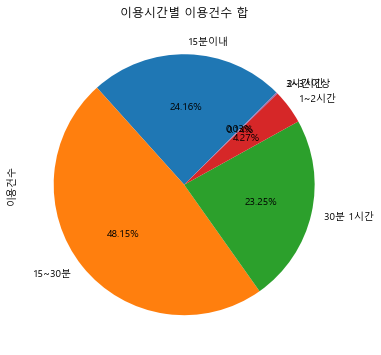

In [71]:
# 위에서 구한 시리즈를 파이 그래프를 이용하여 시각화한다.

age20_bymin_sum.plot(kind='pie', title='이용시간별 이용건수 합', figsize=(6,6), autopct='%1.2f%%', startangle=45);

분석결과 >

20대는 95프로 넘게 1시간패스를 가장 많이 사용한다.

다음 분석주제 > 

20대가 가장 많이 이용하는 이동거리를 구한다. 

# 3.4 이동거리

In [72]:
# bikes 데이터프레임에서 실제로 이동거리가 0보다 큰 데이터만 구하고, 분석에 필요한 컬럼만 선택한다.

crit_a = bikes['연령대코드'] == 'AGE_002'
crit_b = bikes['평균이동거리'] > 0
age20_bydist = bikes[crit_a & crit_b]
age20_bydist.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),평균이동거리,평균이용시간
2,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_002,6,16310,147,2718.33,24.50
5,2019-06-01,101,101. (구)합정동 주민센터,일일(회원),M,AGE_002,1,5780,27,5780.00,27.00
6,2019-06-01,101,101. (구)합정동 주민센터,정기,NaN,AGE_002,4,9670,66,2417.50,16.50
9,2019-06-01,101,101. (구)합정동 주민센터,정기,F,AGE_002,4,9290,75,2322.50,18.75
11,2019-06-01,101,101. (구)합정동 주민센터,정기,M,AGE_002,4,4680,26,1170.00,6.50


In [73]:
# 위에서 구한 최소값과 최대값을 참고해서 이동거리를 구간화한다.

#bins = [1, 5000, 10000, 15000, np.inf]
#labels = ['5km 이내', '10km 이내', '15km 이내', '장거리' ]
bins = [1,1000, 2000, 5000, 10000, 15000, np.inf]
labels = ['1km 이내','1~2km','2~5km ', '5~10km ', '10~15km 이내', '15km 이상' ]
cats_dist = pd.cut(age20_bydist['평균이동거리'], bins=bins, labels=labels)
cats_dist

2          2~5km 
5         5~10km 
6          2~5km 
9          2~5km 
11          1~2km
           ...   
701300     2~5km 
701302     2~5km 
701304     2~5km 
701311     2~5km 
701313     2~5km 
Name: 평균이동거리, Length: 230446, dtype: category
Categories (6, object): [1km 이내 < 1~2km < 2~5km < 5~10km < 10~15km 이내 < 15km 이상]

In [75]:
# 위에서 구간화한 이동거리별로 그룹화한 후, 이용건수의 합을 구한다.

age20_bydist_sum = age20_bydist.groupby(cats_dist)['이용건수'].sum()
age20_bydist_sum

평균이동거리
1km 이내         23657
1~2km         177457
2~5km         546358
5~10km        290859
10~15km 이내     66408
15km 이상        42690
Name: 이용건수, dtype: int64

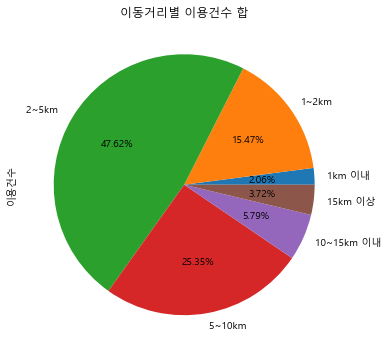

In [76]:
# 위에서 구한 bikes_bydist_sum 을 파이 그래프로 시각화한다.

age20_bydist_sum.plot(kind='pie', title='이동거리별 이용건수 합', figsize=(6,6), autopct='%1.2f%%');

분석 결과 >

20대는 60프로이상이 대여점으로부터 5km 이내를 사용하므로 반납할 대여점도 위에서 구한 인기있는 대여점 10곳 근처 반경 5km 이내에 신설하는 것이 좋다.

다음 분석 >

가장 인기 있는 대여점으로부터 반경 5km 이내의 구역을 표시해본다.

In [78]:
top10_rental.reset_index(inplace=True)

In [79]:
top10_rental

,index,대여소번호,대여소,이용건수,대여소명,대여소주소,위도,경도
0,0,502,502. 뚝섬유원지역 1번출구 앞,7649,502. 뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10,37.531860,127.067192
1,1,207,207. 여의나루역 1번출구 앞,6089,207. 여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098
2,2,2102,2102. 봉림교 교통섬,5690,2102. 봉림교 교통섬,서울특별시 관악구 관천로 52,37.484230,126.926392
3,3,1210,1210. 롯데월드타워(잠실역2번출구 쪽),5193,1210. 롯데월드타워(잠실역2번출구 쪽),서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
4,4,113,113. 홍대입구역 2번출구 앞,5130,113. 홍대입구역 2번출구 앞,서울특별시 마포구 양화로 165,37.557499,126.923805
5,5,3533,3533. 건대입구역 사거리(롯데백화점),5127,건대입구역 사거리(롯데백화점),광진구 자양동 227-337,37.539139,127.070618
6,6,2219,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",4949,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",서울특별시 서초구 신반포로 지하 188,37.506199,127.003944
7,7,1308,1308. 안암로터리 버스정류장 앞,4863,1308. 안암로터리 버스정류장 앞,서울특별시 성북구 안암로 69,37.582592,127.028976
8,8,590,590. 건국대학교 (입학정보관),4087,590. 건국대학교 (입학정보관),서울특별시 광진구 능동로 120,37.539890,127.073364
9,9,152,152. 마포구민체육센터 앞,3706,152. 마포구민체육센터 앞,서울특별시 마포구 망원동 452-4,37.556610,126.898018


In [178]:

#center = [37.541, 126.986]
center = [top10_rental['위도'].mean(), top10_rental['경도'].mean()]
m = folium.Map(location=center, zoom_start=12)

for i in top10_rental.index:
    folium.Circle(
        location = top10_rental.loc[i, ['위도', '경도']],
        tooltip = top10_rental.loc[i, '대여소번호'],
        radius = 500
    ).add_to(m)
m


분석 결과 >

20대가 가장 많이 사용하는 대여점 근처 1시간안에 이동할 수 있고 5km 이내의 동그라미 안에 신설 대여점을 만드는 것이 20대 이용건수를 늘리는 것에 도움이 될 것이다.

# 4. 추가 데이터 분석

## 4-1. 대여일자별 이용건수의 합

In [234]:
# 필요한 컬럼만 선택하고 대여일자를 인덱스로 설정한다.

bikes_byday = bikes[['대여일자', '이용건수']]
bikes_byday.set_index('대여일자', drop=True, inplace=True)
bikes_byday.head()

,이용건수
대여일자,
2019-06-01,3
2019-06-01,2
2019-06-01,6
2019-06-01,1
2019-06-01,2


In [235]:
# bikes에서 '대여일자'를 같은 날짜의 이용건수를 모두 합친다.

bikes_byday = bikes_byday.resample('D').sum()
bikes_byday.head()

,이용건수
대여일자,
2019-06-01,79878
2019-06-02,77091
2019-06-03,82911
2019-06-04,83576
2019-06-05,81515


In [292]:
# 6월달 날씨 데이터를 기상자료개방포털에서 다운받는다.

weather = pd.read_csv('./data/OBS_ASOS_DD_20201222193305.csv', \
                      encoding='cp949', parse_dates=['일시'])
weather.head()

,지점,지점명,일시,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
0,108,서울,2019-06-01,18.90,nan,1.90
1,108,서울,2019-06-02,21.10,nan,1.70
2,108,서울,2019-06-03,23.10,nan,1.80
3,108,서울,2019-06-04,22.60,nan,2.20
4,108,서울,2019-06-05,23.00,nan,1.80


In [293]:
# 날씨 데이터프레임에 필요한 컬럼을 선택하고 일시를 인덱스로 설정한다.

weather = weather[['일시', '평균기온(°C)', '강수 계속시간(hr)', '평균 풍속(m/s)']]
weather.set_index('일시', drop=True, inplace=True)
weather.head()

,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
일시,,,
2019-06-01,18.90,nan,1.90
2019-06-02,21.10,nan,1.70
2019-06-03,23.10,nan,1.80
2019-06-04,22.60,nan,2.20
2019-06-05,23.00,nan,1.80


In [294]:
# 날씨 데이터프레임의 인덱스와 행수, 누락값여부, 각 컬럼의 데이터타입을 알아본다.

weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2019-06-01 to 2019-06-30
Data columns (total 3 columns):
평균기온(°C)       30 non-null float64
강수 계속시간(hr)    14 non-null float64
평균 풍속(m/s)     30 non-null float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [295]:
# 6월에 비가 온 날의 데이터를 살펴본다. -> '강수 계속시간(hr)'에만 null 값이 존재하는데 비가 안온 날을 표시한 것이다.

weather.isnull().sum()

평균기온(°C)        0
강수 계속시간(hr)    16
평균 풍속(m/s)      0
dtype: int64

In [296]:
# 누락값이 존재한 '강수 계속시간(hr)'에 존재하는 값들을 살펴본다.

weather['강수 계속시간(hr)'].value_counts()

0.17     1
9.58     1
8.92     1
3.33     1
1.67     1
2.08     1
0.58     1
11.33    1
0.92     1
8.75     1
0.33     1
2.75     1
3.50     1
12.75    1
Name: 강수 계속시간(hr), dtype: int64

In [297]:
# bikes_byday와 weather 데이터프레임을 날짜 인덱스에 따라 합친다.

bikes_weather_byday = pd.concat([bikes_byday, weather], axis=1)
bikes_weather_byday.head()

,이용건수,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
2019-06-01,79878,18.90,nan,1.90
2019-06-02,77091,21.10,nan,1.70
2019-06-03,82911,23.10,nan,1.80
2019-06-04,83576,22.60,nan,2.20
2019-06-05,81515,23.00,nan,1.80


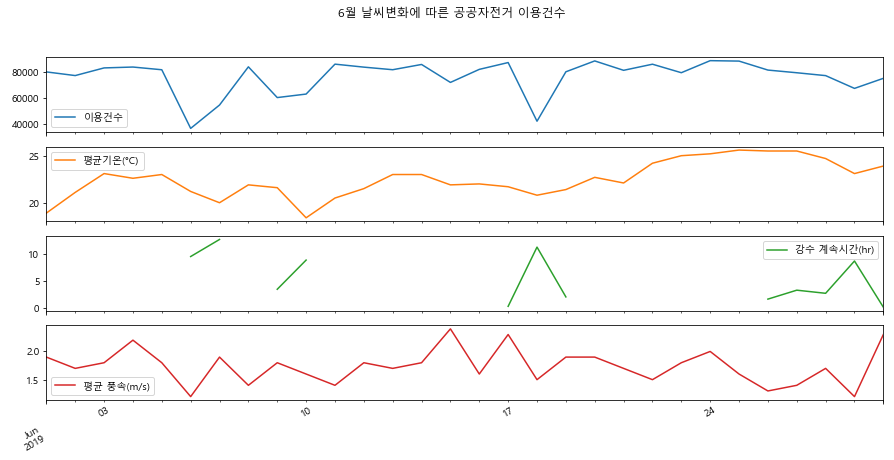

In [298]:
# 공공자전거 데이터프레임과 날씨 데이터프레임을 합친 bikes_weather_byday 데이터프레임의 각 컬럼을 line함수로 시각화한다.

bikes_weather_byday.plot(kind='line',figsize=(15,7), \
                         title='6월 날씨변화에 따른 공공자전거 이용건수', subplots=True);

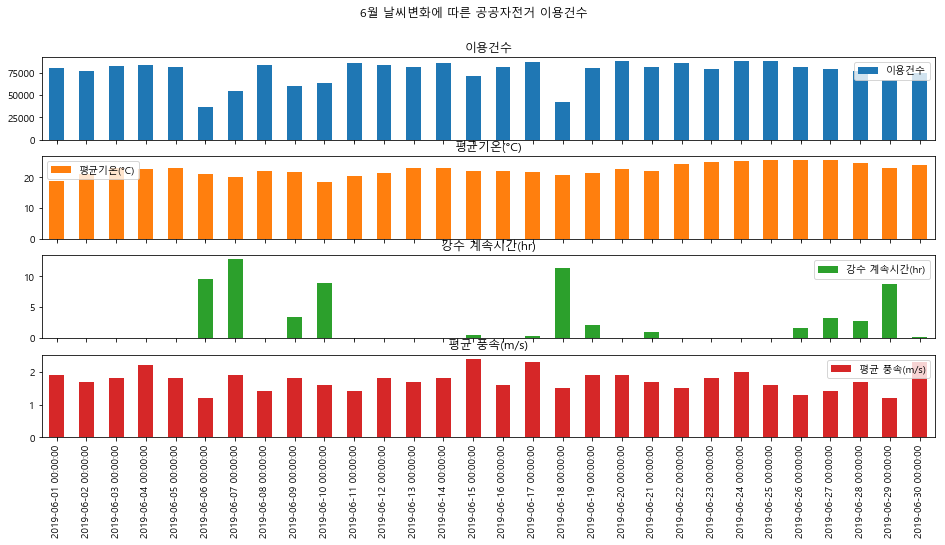

In [299]:
''' 공공자전거 데이터프레임과 날씨 데이터프레임을 합친 bikes_weather_byday 데이터프레임의 
각 컬럼을 bar함수로 시각화한다.'''

bikes_weather_byday.plot(kind='bar',figsize=(16,7), \
                         title='6월 날씨변화에 따른 공공자전거 이용건수', subplots=True);

In [300]:
# bikes_weather_byday 의 각 컬럼간의 상관관계를 조사한다.

bikes_weather_byday.corr()

,이용건수,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
이용건수,1.00,0.42,-0.82,0.27
평균기온(°C),0.42,1.00,-0.54,-0.07
강수 계속시간(hr),-0.82,-0.54,1.00,-0.51
평균 풍속(m/s),0.27,-0.07,-0.51,1.00


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


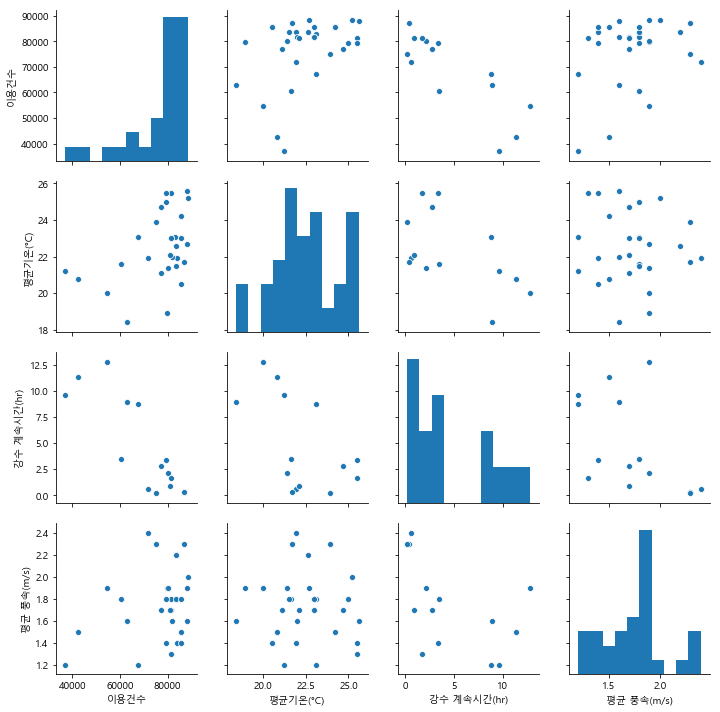

In [301]:
# 데이터프레임의 컬럼들 사이의 상관관계를 잘 보여줄 수 있는 시각화 라이브러리를 임포트하여 위에서 구한 상관관계를 그래프로 확인해본다.

import seaborn as sns

sns.pairplot(data=bikes_weather_byday);

## 4-2. '연령대코드'별로 그룹화

### 4-2-1. '연령대코드'로 그룹화한 후 '이용건수'의 합을 구해본다.

In [302]:
# 연령대코드의 값들을 확인한다.

bikes['연령대코드'].value_counts()

AGE_002    232196
AGE_003    164657
AGE_004    116624
AGE_005     78946
AGE_001     52820
AGE_006     26879
AGE_008     22806
AGE_007      6389
Name: 연령대코드, dtype: int64

In [303]:
# 연령대코드로 그룹화하여 이용건수의 합을 구한다.

bikes_byage = bikes.groupby('연령대코드')['이용건수'].sum()
bikes_byage.head()

연령대코드
AGE_001      97542
AGE_002    1149248
AGE_003     514313
AGE_004     290765
AGE_005     147422
Name: 이용건수, dtype: int64

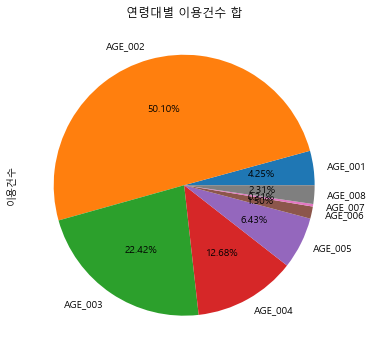

In [305]:
# 연령대별로 이용건수의 합을 시각화한다.

bikes_byage.plot(kind='pie', title='연령대별 이용건수 합', figsize=(6,6), \
                 autopct='%1.2f%%');

### 4-2-2. '대여일자'와 연령대코드'로 그룹화한 후 '이용건수'를 합을 구해 본다.

In [308]:
# 대여일자와 연령별로 그룹화한 후, 이용건수의 합을 구한다.

bikes_bydayage_sum = bikes.pivot_table( \
                 index = '대여일자', \
                 columns = '연령대코드', \
                 values = '이용건수', \
                 aggfunc = 'sum')
bikes_bydayage_sum

연령대코드,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008
대여일자,,,,,,,,
2019-06-01,3916,41697,16868,8840,4569,1027,205,2756
2019-06-02,3729,41780,16045,7934,3790,859,193,2761
2019-06-03,2949,41902,19298,10891,5101,1162,233,1375
2019-06-04,3101,41146,19454,11398,5632,1298,278,1269
2019-06-05,3019,40220,18788,10952,5616,1292,238,1390
2019-06-06,1675,17673,7833,4855,3012,782,181,934
2019-06-07,2415,27920,12554,6308,3225,733,182,1364
2019-06-08,3781,43539,18159,9339,4728,1080,242,2868
2019-06-09,2947,31051,12901,7026,3568,805,196,1877


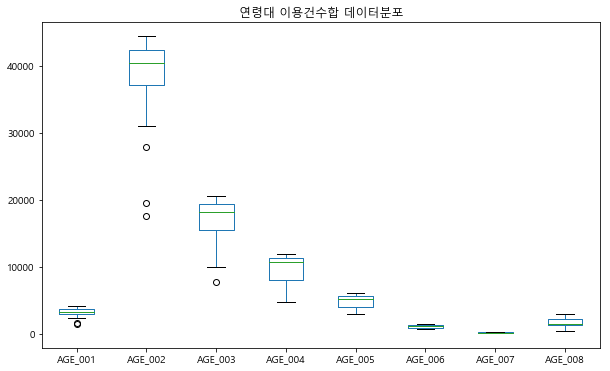

In [309]:
# 위에서 만든 데이터프레임을 상자 그래프로 시각화하여 각 연령대별 이용건수의 데이터분포를 알아본다.

bikes_bydayage_sum.plot(kind='box', title='연령대 이용건수합 데이터분포', figsize=(10, 6));

## 4-3. '이용시간'을 6개의 구간으로 나누어 그룹화

### 4-3-1. '대여일자'와 '이용시간(분)'으로 그룹화한 후 '이용건수'의 평균을 구해본다.

In [310]:
# 등록절차에서 오류거나 사용안한 경우가 얼마나 차지하는지 알아본다. -> 0.12 프로정도 차지한다.

(bikes[bikes['평균이용시간'] <= 0].size) / bikes.size * 100

0.12333937434854708

In [311]:
# 실제로 공공자전거를 사용했다고 볼 수 있는 '이용시간(분)'이 0보다 큰 데이터만 추출한다.

bikes_used = bikes[bikes['평균이용시간'] > 0]
bikes_used.set_index('대여일자', drop=True, inplace=True)
bikes_used.head()

,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),평균이동거리,평균이용시간
대여일자,,,,,,,,,,,,
2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),NaN,AGE_008,3,274.90,2.48,10680,109,3560.00,36.33
2019-06-01,101,101. (구)합정동 주민센터,일일(비회원),M,AGE_008,2,164.48,1.48,6390,60,3195.00,30.00
2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_002,6,441.55,3.78,16310,147,2718.33,24.50
2019-06-01,101,101. (구)합정동 주민센터,일일(회원),NaN,AGE_003,1,446.07,4.02,17330,177,17330.00,177.00
2019-06-01,101,101. (구)합정동 주민센터,일일(회원),F,AGE_003,2,599.23,6.10,26290,114,13145.00,57.00


In [312]:
# 위에서 구한 이용시간의 최소값과 최대값을 이용해서 구간을 정한다. -> 시간단위로 빌린다. 60분 120분

bins = [0,15, 30, 60, 120, 180, np.inf]
labels = ['15분이내','15~30분','30분 1시간', '1~2시간', '2~3시간', '3시간이상']
cats = pd.cut(bikes_used['평균이용시간'], bins=bins, labels=labels)
cats

대여일자
2019-06-01    30분 1시간
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01      2~3시간
2019-06-01    30분 1시간
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01      15분이내
2019-06-01      1~2시간
2019-06-01      15분이내
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01     15~30분
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01    30분 1시간
2019-06-01      15분이내
2019-06-01      1~2시간
2019-06-01     15~30분
2019-06-01     15~30분
2019-06-01    30분 1시간
2019-06-01     15~30분
2019-06-01    30분 1시간
               ...   
2019-06-30    30분 1시간
2019-06-30    30분 1시간
2019-06-30     15~30분
2019-06-30     15~30분
2019-06-30      15분이내
2019-06-30      15분이내
2019-06-30      15분이내
2019-06-30     15~30분
2019-06-30    30분 1시간
2019-06-30    30분 1시간
2019-06-30    30분 1시간
2019-06-30    30분 1시간
2019-06-30     15~30분
2019-06-30      15분이내
2019-

In [313]:
# 구간을 정한 이용시간을 확인한다.

cats.values

[30분 1시간, 15~30분, 15~30분, 2~3시간, 30분 1시간, ..., 15분이내, 15분이내, 15분이내, 15분이내, 15분이내]
Length: 700452
Categories (6, object): [15분이내 < 15~30분 < 30분 1시간 < 1~2시간 < 2~3시간 < 3시간이상]

In [314]:
# 구간을 정한 이용시간에 따라 그룹화하고 이용건수의 합을 구한다.

bikes_bymin = bikes_used.groupby(cats)['이용건수'].sum()
bikes_bymin

평균이용시간
15분이내      606652
15~30분     992279
30분 1시간    561734
1~2시간      125197
2~3시간        5772
3시간이상        1373
Name: 이용건수, dtype: int64

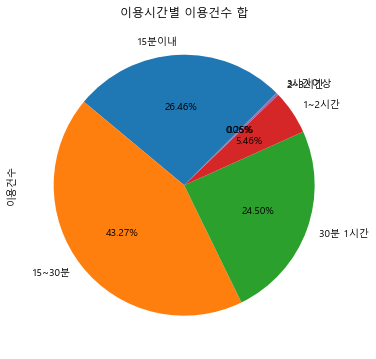

In [315]:
# 위에서 구한 시리즈를 파이 그래프를 이용하여 시각화한다.

bikes_bymin.plot(kind='pie', title='이용시간별 이용건수 합', figsize=(6,6), \
                 autopct='%1.2f%%', startangle=45);

### 4-3-2. '대여일자'와 '이용시간(분)'으로 그룹화한 후 '이용건수'의 합을 구해본다.

In [316]:
# 대여일자와 위에서 위에서 구간을 나눈 이용시간별로 그룹화한 후, 이용건수의 합을 구한다.

bikes_bydaymin = bikes_used.pivot_table( \
                      index = '대여일자', \
                      columns = cats, \
                      values = '이용건수', \
                      aggfunc = 'sum')
bikes_bydaymin

평균이용시간,15분이내,15~30분,30분 1시간,1~2시간,2~3시간,3시간이상
대여일자,,,,,,
2019-06-01,16004,29866,26362,7286,272,63
2019-06-02,14748,28284,26890,6828,273,44
2019-06-03,21599,40397,17895,2835,144,26
2019-06-04,23059,40373,17282,2687,111,40
2019-06-05,23100,38781,16473,2944,143,49
2019-06-06,13858,12699,7921,2248,133,56
2019-06-07,11742,22265,16686,3795,156,34
2019-06-08,15428,31785,28278,7836,301,82
2019-06-09,16129,23263,16823,3829,263,42


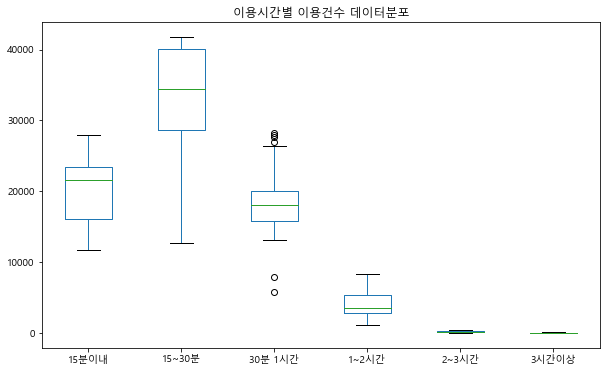

In [317]:
# 위에서 구한 데이터프레임을 박스 그래프로 시각화한다.

bikes_bydaymin.plot(kind='box', title='이용시간별 이용건수 데이터분포', figsize=(10, 6));

### 4-3-3. '연령대코드'와 '이용시간(분)'으로 그룹화한 후 '이용건수'의 합을 구해본다.

In [318]:
''' 연령대별, 구간화된 이용시간으로 그룹화한 후, 이용건수의 합을 구해서 각각의 연령대별로 
주로 이용하는 이용시간이 어떤지 알아본다.'''

bikes_byagemin = bikes_used.pivot_table( \
                      index = '연령대코드', \
                      columns = cats, \
                      values = '이용건수', \
                      aggfunc = 'sum')
bikes_byagemin

평균이용시간,15분이내,15~30분,30분 1시간,1~2시간,2~3시간,3시간이상
연령대코드,,,,,,
AGE_001,37178,28748,23366,7469,544,143
AGE_002,277548,553246,267173,49117,1626,310
AGE_003,138330,223271,126874,24082,1323,254
AGE_004,83387,115638,73738,16638,944,266
AGE_005,48710,51144,37376,9588,384,109
AGE_006,13037,8804,8141,4314,125,23
AGE_007,3161,1575,1634,742,24,26
AGE_008,5301,9853,23432,13247,802,242


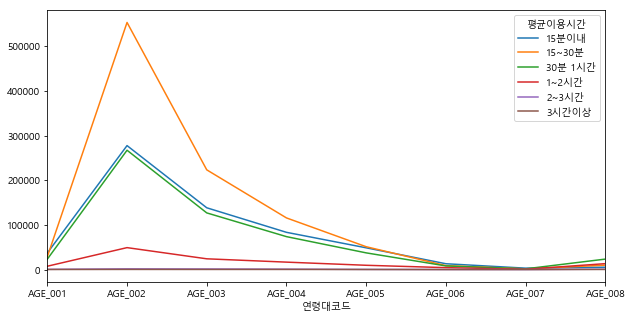

In [319]:
# 위에서 구한 데이터프레임을 시각화한다. -> 20대는 15분~30분이내를 가장 많이 사용한다.

bikes_byagemin.plot(figsize=(10, 5));

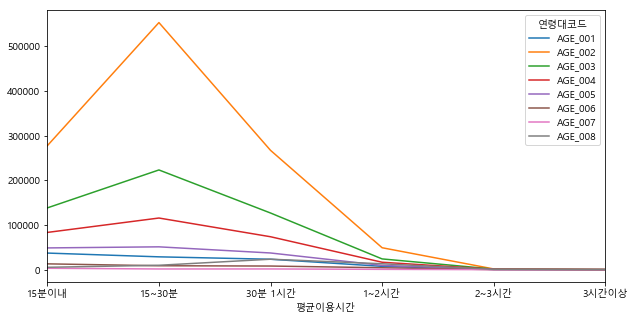

In [280]:
# 위에서 구한 데이터프레임을 시각화한다. -> 20대 ~ 40대는 15분~30분을 가장 많이 사용한다.

bikes_byagemin.T.plot(figsize=(10, 5));

## 4-4. 평균이동거리에 따라 그룹화하고 '이용건수' 분석

### 4-4-1. '평균이용거리'로 그룹화한 후 '이용건수'의 합을 구해본다.

In [320]:
# bikes 데이터프레임에서 실제로 이동거리가 0보다 큰 데이터만 구하고, 필요한 컬럼만 선택한다.

bikes_bydist = bikes[bikes['평균이동거리'] > 0]
bikes_bydist = bikes[['대여일자', '평균이동거리', '이용건수']]
bikes_bydist.head()

,대여일자,평균이동거리,이용건수
0,2019-06-01,3560.00,3
1,2019-06-01,3195.00,2
2,2019-06-01,2718.33,6
3,2019-06-01,17330.00,1
4,2019-06-01,13145.00,2


In [321]:
# 위에서 구한 최소값과 최대값을 참고해서 이동거리를 구간화한다.

bins = [1,1000, 2000, 5000, 10000, 15000, np.inf]
labels = ['1km 이내','1~2km','2~5km ', '5~10km ', '10~15km 이내', '15km 이상' ]
cats_dist = pd.cut(bikes_bydist['평균이동거리'], bins=bins, labels=labels)
cats_dist.head()

0        2~5km 
1        2~5km 
2        2~5km 
3       15km 이상
4    10~15km 이내
Name: 평균이동거리, dtype: category
Categories (6, object): [1km 이내 < 1~2km < 2~5km < 5~10km < 10~15km 이내 < 15km 이상]

In [322]:
# 위에서 구간화한 이동거리별로 그룹화한 후, 이용건수의 합을 구한다.

bikes_bydist_sum = bikes_bydist.groupby(cats_dist)['이용건수'].sum()
bikes_bydist_sum

평균이동거리
1km 이내          85726
1~2km          400723
2~5km         1029922
5~10km         532322
10~15km 이내     133291
15km 이상        104060
Name: 이용건수, dtype: int64

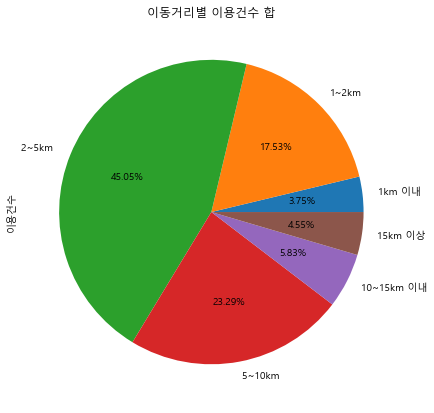

In [323]:
# 위에서 구한 bikes_bydist_sum 을 파이 그래프로 시각화한다.

bikes_bydist_sum.plot(kind='pie', title='이동거리별 이용건수 합', figsize=(7,7), \
                      autopct='%1.2f%%');

### 4-4-2. '대여일자'와 '이용거리(M)'으로 그룹화한 후 '이용건수'의 합을 구해본다.

In [324]:
# 대여일자와 구간화한 이동거리로 그룹화한 후, 이용건수의 합을 구한다.

bikes_bydaydist_sum = bikes_bydist.pivot_table(\
                                              index = '대여일자', \
                                              columns = cats_dist, \
                                              values = '이용건수', \
                                              aggfunc = 'sum')
bikes_bydaydist_sum.head()

평균이동거리,1km 이내,1~2km,2~5km,5~10km,10~15km 이내,15km 이상
대여일자,,,,,,
2019-06-01,2552,12034,34119,22472,5059,3430
2019-06-02,2361,10652,33054,22327,5304,3153
2019-06-03,2698,13216,40303,18985,4276,3236
2019-06-04,2705,14889,40192,18668,3957,2952
2019-06-05,2771,15238,38849,17534,3901,3006


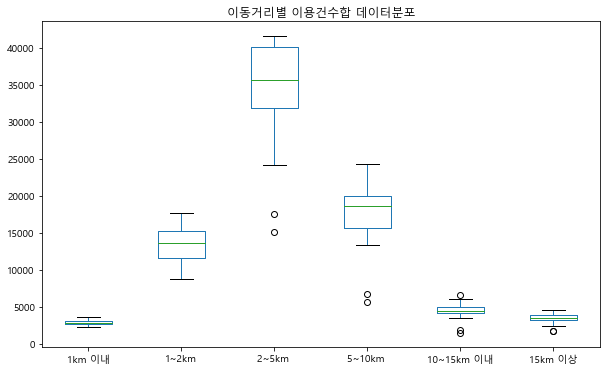

In [325]:
# 박스 그래프로 이동거리의 데이터분포를 살펴본다.

bikes_bydaydist_sum.plot(kind='box', title='이동거리별 이용건수합 데이터분포', \
                         figsize=(10,6));

# 5. 데이터 확장 및 전처리

In [331]:
import glob

bikes_all = []

files = glob.glob('./data/공공자전거_*.csv')
for f in files:
    bikes_all.append(pd.read_csv(f, encoding='cp949', parse_dates=['대여일자']))

bikes_all.head()

AttributeError: 'list' object has no attribute 'head'

In [329]:
''' 서울시 공공자전거 파일이 너무 큰 용량이라서 서울시 열린 데이테 사이트에서 파일을 여러개로 
분산해 놓았다. 이 파일들을 다운로드 받아서 파일명을 간단히 변경한 후, 파이썬 딕셔너리 
bikes에 저장한다.'''

bikes = {}

for i in range(16):
    bikes[i] = pd.read_csv('./data/공공자전거_{}.csv'.format(i), \
                           encoding = 'cp949', parse_dates=['대여일자'])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

In [261]:
# pd.concat를 사용해서 하나로 만든다.

bikes_all = pd.concat(bikes, axis='index')
bikes_all.head()

대여일자  대여시간  대여소번호                대여소명 대여구분코드  성별 연령대코드  이용건수  \
0 0 2018-12-01     0   1721     1721. 창동역 2번출구     정기권  \N  ~10대     1   
  1 2018-12-01     0   3511      3511. 응봉역 1번출구    정기권  \N  ~10대     1   
  2 2018-12-01     0   1975  1975. 대림역 1번 출입구 밑    정기권  \N  ~10대     1   
  3 2018-12-01     0    110            110. 사천교    정기권  \N  ~10대     1   
  4 2018-12-01     0    749      749. 이대 목동병원 앞    정기권  \N  ~10대     1   

        운동량   탄소량    이동거리  사용시간  
0 0   25.95  0.26  1130.0     4  
  1   52.59  0.39  1660.0    72  
  2  136.26  1.17  5060.0    21  
  3   17.76  0.16   690.0     2  
  4   95.67   0.7  3020.0    15

In [262]:
bikes_all.tail()

대여일자  대여시간  대여소번호                         대여소명 대여구분코드 성별  \
15 6894861 2020-05-31    23   1610            1610. 화랑대역 2번출구 앞    일일권  M   
   6894862 2020-05-31    23   2318    2318. 삼성중앙역4번출구(문화센터더 리빌)    일일권  M   
   6894863 2020-05-31    23   2329  2329. 르네상스호텔사거리 역삼지하보도 2번출구    일일권  M   
   6894864 2020-05-31    23   1450              1450. 화랑대역 7번출구    일일권  M   
   6894865 2020-05-31    23   2418             2418.봉은사역 7번 출구     단체권  M   

           연령대코드  이용건수     운동량   탄소량    이동거리  사용시간  
15 6894861   30대     1  231.20  1.65  7120.0    34  
   6894862   30대     1  175.53  1.37  5910.0    40  
   6894863   30대     1    0.00  0.00     0.0    20  
   6894864   40대     1    0.00  0.00     0.0     5  
   6894865   20대     1    0.00  0.00     0.0    12

In [263]:
# bikes_all 앞부분과 끝부분에 있는 2018, 2020년도 데이터를 없애고 2019-01-01 ~ 2019-12-31 데이터만 추출한다.

start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2020-01-01')
start, end

(Timestamp('2019-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [264]:
# 필요한 컬럼만 뽑아서 다시 bikes_all을 만든다.

crit = (bikes_all['대여일자'] >= start) & (bikes_all['대여일자'] < end)
bikes_all = bikes_all.loc[crit, ['대여일자', '대여소번호', '대여소명', '연령대코드', '이용건수', '이동거리', '사용시간']]

bikes_all.head()

대여일자  대여소번호              대여소명 연령대코드  이용건수    이동거리  사용시간
0 460036 2019-01-01    458    458. 광화문역 5번출구  ~10대     1  1630.0    29
  460037 2019-01-01   2159        2159. 인헌초교   20대     1  1250.0     7
  460038 2019-01-01   1362   1362. 보문역6번출구 앞   20대     1   980.0     5
  460039 2019-01-01   3106   3106. 홍남교 두바퀴쉼터   20대     1   420.0     4
  460040 2019-01-01    118  118. 광흥창역 2번출구 앞   20대     1  1100.0     7

In [265]:
bikes_all.tail()

대여일자  대여소번호                   대여소명 연령대코드  이용건수     이동거리  사용시간
15 776951 2019-12-31    544             544. 광남중학교  ~10대     4  13430.0   146
   776952 2019-12-31    337            337. 창경궁 입구   20대     2   3730.0    26
   776953 2019-12-31    428             428. 명보사거리   20대     2   3930.0    62
   776954 2019-12-31   1059  1059. 래미안 강동팰리스(102동)  ~10대     2   6980.0   116
   776955 2019-12-31   1235     1235. 잠실트리지움310동 옆   20대     2   8480.0   107

In [266]:
# multiindex로 표시되므로 bikes_all 의 인덱스와 컬럼을 살펴본다.

bikes_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14291359 entries, (0, 460036) to (15, 776955)
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여소번호   int64         
 2   대여소명    object        
 3   연령대코드   object        
 4   이용건수    int64         
 5   이동거리    float64       
 6   사용시간    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 884.0+ MB


In [268]:
# multiindex 로 표시되므로 bikes_all 의 인덱스와 컬럼을 살펴본다.

bikes_all.index         # 여러 파일을 합치다보니 앞부분의 0 ~ 15 는 파일 번호를 나타내므로 reset_index를 수행한다.

MultiIndex([( 0, 460036),
            ( 0, 460037),
            ( 0, 460038),
            ( 0, 460039),
            ( 0, 460040),
            ( 0, 460041),
            ( 0, 460042),
            ( 0, 460043),
            ( 0, 460044),
            ( 0, 460045),
            ...
            (15, 776946),
            (15, 776947),
            (15, 776948),
            (15, 776949),
            (15, 776950),
            (15, 776951),
            (15, 776952),
            (15, 776953),
            (15, 776954),
            (15, 776955)],
           length=14291359)

In [269]:
bikes_all.reset_index(inplace=True)
bikes_all.index

RangeIndex(start=0, stop=14291359, step=1)

In [101]:
#  각 컬럼에 누락값이 있는지 확인한다.

bikes_all.isnull().sum()      # 성별에만 누락값이 존재한다. -> 누락값이 전체 데이터의 몇프로인지 알아본다.

level_0    0
level_1    0
대여일자       0
대여소번호      0
대여소명       0
연령대코드      0
이용건수       0
이동거리       0
사용시간       0
dtype: int64

In [102]:
# bikes_all['연령대코드'] 값이 어떤지 살펴본다. -> 카테고리 변수화? -> 그대로 써도 메모리만 많이 차지하지 그룹화할때 상관없을듯
# 회의 후 결정

bikes_all['연령대코드'].unique()

array(['~10대', '20대', '30대', '40대', '50대', '60대', '70대~'], dtype=object)

# 6. 확장된 데이터 모델링 및 시각화

## 6-1. '대여일자'를 일자별로 샘플링

### 6-1-1 '대여일자'를 일자별로 샘플링하여 '이용건수'의 합을 알아보고 시각화한다.

In [270]:
# 분석에 필요한 컬럼만 선택해서 대여일자를 인덱스로 설정하고 일단위로 resample하여 이용건수의 합을 구한다.

bikes_all_byday = bikes_all[['대여일자', '이용건수']]
bikes_all_byday.set_index('대여일자', drop=True, inplace=True)
bikes_all_byday = bikes_all_byday.resample('D').sum()
bikes_all_byday.head()

,이용건수
대여일자,
2019-01-01,5428
2019-01-02,9405
2019-01-03,10546
2019-01-04,11106
2019-01-05,7896


In [271]:
# 위에서 만든 bikes_all_byday 데이터프레임의 정보를 알아본다.

bikes_all_byday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   이용건수    365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


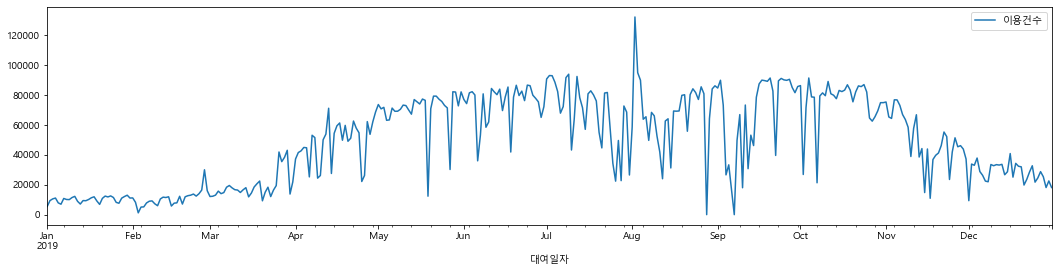

In [272]:
# 2019년 동안의 공공자전거 이용건수를 시각해본다.

bikes_all_byday.plot(figsize=(18, 4));

### 5-1-2 날씨데이터를 다운받아서 위에서 구한 대여일자별 이용건수와 합하여 시각화한다.

In [273]:
# 2019년 1년동안의 날씨 데이터를 기상자료개방포털에서 다운받는다.

weather_temp = {}

for i in range(12):
    weather_temp[i] = pd.read_csv('./data/OBS_ASOS_DD_{}.csv'.format(i+1), encoding = 'cp949', parse_dates=['일시'])

In [274]:
# 12개의 파일을 이어붙이고, 여러개의 파일에 대한 멀티인덱스를 리셋하여 0부터 365까지의 rangeindex인지 확인한다.

weather_foryear = pd.concat(weather_temp, axis='index')
weather_foryear = weather_foryear[['일시', '평균기온(°C)', '강수 계속시간(hr)', '평균 풍속(m/s)']]
weather_foryear.reset_index(inplace=True)
weather_foryear.drop(['level_0', 'level_1'], axis=1, inplace=True)
weather_foryear.head()

,일시,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
0,2019-01-01,-5.0,NaN,2.1
1,2019-01-02,-4.9,NaN,1.7
2,2019-01-03,-3.5,NaN,1.4
3,2019-01-04,-1.1,NaN,1.2
4,2019-01-05,-2.8,NaN,2.2


In [275]:
weather_foryear.tail()

,일시,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
360,2019-12-27,-1.7,NaN,2.1
361,2019-12-28,1.1,NaN,2.0
362,2019-12-29,3.8,6.75,2.9
363,2019-12-30,2.7,5.08,2.9
364,2019-12-31,-7.9,1.58,3.1


In [276]:
weather_foryear.index

RangeIndex(start=0, stop=365, step=1)

In [277]:
# 일시를 Index로 설정한다.

weather_foryear.set_index('일시', inplace=True)
weather_foryear.head()

,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
일시,,,
2019-01-01,-5.0,NaN,2.1
2019-01-02,-4.9,NaN,1.7
2019-01-03,-3.5,NaN,1.4
2019-01-04,-1.1,NaN,1.2
2019-01-05,-2.8,NaN,2.2


In [278]:
bikes_weather_foryear = pd.concat([bikes_all_byday, weather_foryear], axis='columns')
bikes_weather_foryear.head()

,이용건수,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
2019-01-01,5428,-5.0,NaN,2.1
2019-01-02,9405,-4.9,NaN,1.7
2019-01-03,10546,-3.5,NaN,1.4
2019-01-04,11106,-1.1,NaN,1.2
2019-01-05,7896,-2.8,NaN,2.2


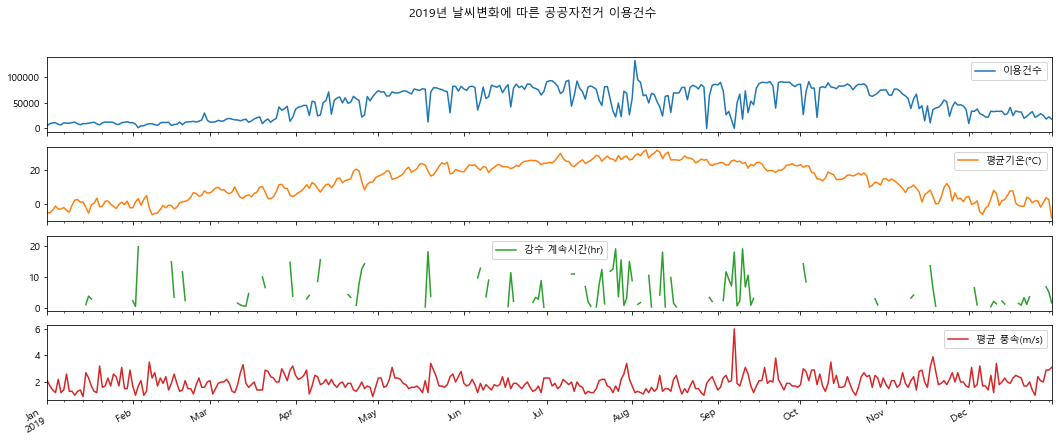

In [279]:
# 공공자전거 데이터프레임과 날씨 데이터프레임을 합친 bikes_weather_foryear 데이터프레임의 각 컬럼을 line함수로 시각화한다.

bikes_weather_foryear.plot(kind='line',figsize=(18,7), title='2019년 날씨변화에 따른 공공자전거 이용건수', subplots=True);

In [280]:
# bikes_weather_foryear 의 각 컬럼간의 상관관계를 조사한다.
# 6월 데이터는 강수량과 이용건수가 상관관계가 높았으나, 1년 데이터는 기온과 이용건수가 상관관계가 가장 높다.

bikes_weather_foryear.corr()

,이용건수,평균기온(°C),강수 계속시간(hr),평균 풍속(m/s)
이용건수,1.000000,0.751329,-0.425502,-0.094363
평균기온(°C),0.751329,1.000000,0.101966,-0.147768
강수 계속시간(hr),-0.425502,0.101966,1.000000,-0.002997
평균 풍속(m/s),-0.094363,-0.147768,-0.002997,1.000000


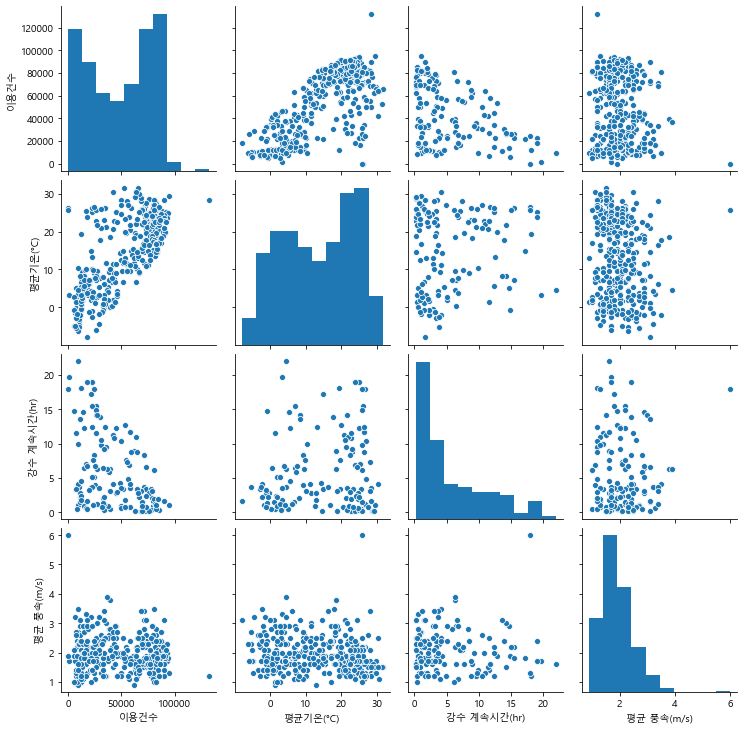

In [281]:
# 위에서 살펴본 상관관계를 시각화해본다.

sns.pairplot(data=bikes_weather_foryear);